В данной работе проводится разведочный анализ данных о доставках, а также обучение и оценка моделей машинного обучения для предсказания времени доставки

В качестве метрики для оценки качества будут использоваться RMSE и MAE

Данные взяты с https://www.kaggle.com/datasets/gauravmalik26/food-delivery-dataset/data/code

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("train.csv")

In [ ]:
print(f'Dataset: {df.shape}')#посмтрим на размер датасета

Dataset: (45593, 20)


In [ ]:
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,(min) 32
45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 36
45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 16
45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 26


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [ ]:
# переименуем колонки
df = df.rename(columns={
    'ID':                             'id',
    'Delivery_person_ID':             'delivery_person_id',
    'Delivery_person_Age':            'delivery_person_age',
    'Delivery_person_Ratings':        'delivery_person_ratings',
    'Restaurant_latitude':            'restaurant_latitude',
    'Restaurant_longitude':           'restaurant_longitude',
    'Delivery_location_latitude':     'delivery_location_latitude',
    'Delivery_location_longitude':    'delivery_location_longitude',
    'Order_Date':                     'order_date',
    'Time_Orderd':                    'time_ordered',
    'Time_Order_picked':              'time_picked',
    'Weatherconditions':              'weather_conditions',
    'Road_traffic_density':           'road_traffic_density',
    'Vehicle_condition':              'vehicle_condition',
    'Type_of_order':                  'type_of_order',
    'Type_of_vehicle':                'type_of_vehicle',
    'multiple_deliveries':            'multiple_deliveries',
    'Festival':                       'festival',
    'City':                           'city',
    'Time_taken(min)':                'time_taken_min'
})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           45593 non-null  object 
 1   delivery_person_id           45593 non-null  object 
 2   delivery_person_age          45593 non-null  object 
 3   delivery_person_ratings      45593 non-null  object 
 4   restaurant_latitude          45593 non-null  float64
 5   restaurant_longitude         45593 non-null  float64
 6   delivery_location_latitude   45593 non-null  float64
 7   delivery_location_longitude  45593 non-null  float64
 8   order_date                   45593 non-null  object 
 9   time_ordered                 45593 non-null  object 
 10  time_picked                  45593 non-null  object 
 11  weather_conditions           45593 non-null  object 
 12  road_traffic_density         45593 non-null  object 
 13  vehicle_conditio

In [ ]:
dup = df.duplicated(keep=False) #проверим наличие дубликатов
duplicates = df[dup]
duplicates

,id,delivery_person_id,delivery_person_age,delivery_person_ratings,restaurant_latitude,restaurant_longitude,delivery_location_latitude,delivery_location_longitude,order_date,time_ordered,time_picked,weather_conditions,road_traffic_density,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city,time_taken_min


In [ ]:
total_dup = dup.sum() #нет дубликатов
print(total_dup)

0


In [ ]:
df.isna().sum() #проверим наличие пропусков

,0
id,0
delivery_person_id,0
delivery_person_age,0
delivery_person_ratings,0
restaurant_latitude,0
restaurant_longitude,0
delivery_location_latitude,0
delivery_location_longitude,0
order_date,0
time_ordered,0


In [ ]:
(df=='NaN ').sum()

,0
id,0
delivery_person_id,0
delivery_person_age,1854
delivery_person_ratings,1908
restaurant_latitude,0
restaurant_longitude,0
delivery_location_latitude,0
delivery_location_longitude,0
order_date,0
time_ordered,1731


In [ ]:
df = df.replace({"NaN ": np.nan})

In [ ]:
(df=='NaN ').sum()

,0
id,0
delivery_person_id,0
delivery_person_age,0
delivery_person_ratings,0
restaurant_latitude,0
restaurant_longitude,0
delivery_location_latitude,0
delivery_location_longitude,0
order_date,0
time_ordered,0


In [ ]:
df

,id,delivery_person_id,delivery_person_age,delivery_person_ratings,restaurant_latitude,restaurant_longitude,delivery_location_latitude,delivery_location_longitude,order_date,time_ordered,time_picked,weather_conditions,road_traffic_density,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city,time_taken_min
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,(min) 32
45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 36
45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 16
45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 26


In [ ]:
df['order_date'] = pd.to_datetime(df['order_date'], format='%d-%m-%Y', errors='coerce')
df['time_ordered'] = pd.to_timedelta(df['time_ordered'])

df['time_picked'] = pd.to_timedelta(df['time_picked'])

df['delivery_person_age'] = pd.to_numeric(df['delivery_person_age'], errors='coerce').astype('Int64')
df['delivery_person_ratings'] = pd.to_numeric(df['delivery_person_ratings'], errors='coerce')
df['multiple_deliveries'] = pd.to_numeric(df['multiple_deliveries'], errors='coerce').astype('Int64')

df['road_traffic_density'] = df['road_traffic_density'].astype('category')
df['weather_conditions'] = df['weather_conditions'].astype('category')
df['type_of_order'] = df['type_of_order'].astype('category')
df['type_of_vehicle'] = df['type_of_vehicle'].astype('category')
df['city'] = df['city'].astype('category')

df['id'] = df['id'].astype('category')
df['delivery_person_id'] = df['delivery_person_id'].astype('category')

In [ ]:
df

,id,delivery_person_id,delivery_person_age,delivery_person_ratings,restaurant_latitude,restaurant_longitude,delivery_location_latitude,delivery_location_longitude,order_date,time_ordered,time_picked,weather_conditions,road_traffic_density,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city,time_taken_min
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,0 days 11:30:00,0 days 11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,0 days 19:45:00,0 days 19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,0 days 08:30:00,0 days 08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,0 days 18:00:00,0 days 18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,0 days 13:30:00,0 days 13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,0 days 11:35:00,0 days 11:45:00,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,(min) 32
45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,0 days 19:55:00,0 days 20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 36
45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,0 days 23:50:00,0 days 00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 16
45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,0 days 13:35:00,0 days 13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 26


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype          
---  ------                       --------------  -----          
 0   id                           45593 non-null  category       
 1   delivery_person_id           45593 non-null  category       
 2   delivery_person_age          43739 non-null  Int64          
 3   delivery_person_ratings      43685 non-null  float64        
 4   restaurant_latitude          45593 non-null  float64        
 5   restaurant_longitude         45593 non-null  float64        
 6   delivery_location_latitude   45593 non-null  float64        
 7   delivery_location_longitude  45593 non-null  float64        
 8   order_date                   45593 non-null  datetime64[ns] 
 9   time_ordered                 43862 non-null  timedelta64[ns]
 10  time_picked                  45593 non-null  timedelta64[ns]
 11  weather_conditions          

In [ ]:
df

,id,delivery_person_id,delivery_person_age,delivery_person_ratings,restaurant_latitude,restaurant_longitude,delivery_location_latitude,delivery_location_longitude,order_date,time_ordered,time_picked,weather_conditions,road_traffic_density,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city,time_taken_min
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,0 days 11:30:00,0 days 11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,0 days 19:45:00,0 days 19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,0 days 08:30:00,0 days 08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,0 days 18:00:00,0 days 18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,0 days 13:30:00,0 days 13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,0 days 11:35:00,0 days 11:45:00,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,(min) 32
45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,0 days 19:55:00,0 days 20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 36
45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,0 days 23:50:00,0 days 00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 16
45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,0 days 13:35:00,0 days 13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 26


In [ ]:
df

,id,delivery_person_id,delivery_person_age,delivery_person_ratings,restaurant_latitude,restaurant_longitude,delivery_location_latitude,delivery_location_longitude,order_date,time_ordered,time_picked,weather_conditions,road_traffic_density,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city,time_taken_min
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,0 days 11:30:00,0 days 11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,0 days 19:45:00,0 days 19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,0 days 08:30:00,0 days 08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,0 days 18:00:00,0 days 18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,0 days 13:30:00,0 days 13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,0 days 11:35:00,0 days 11:45:00,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,(min) 32
45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,0 days 19:55:00,0 days 20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 36
45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,0 days 23:50:00,0 days 00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 16
45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,0 days 13:35:00,0 days 13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 26


In [ ]:
df['datetime_order']=pd.to_datetime(df['order_date']+df['time_ordered'], dayfirst=True) #обрабатываем время доставки и забора заказа с переходом через полноч
df['datetime_picked']=pd.to_datetime(df['order_date']+df['time_picked'], dayfirst=True)

mask=df['time_picked']<df['time_ordered']
df.loc[mask, 'datetime_picked'] += pd.Timedelta(days=1)
df['time_to_pick_min']=(df['datetime_picked'] - df['datetime_order']).dt.total_seconds() / 60

df['time_taken_min_clean'] = (df['time_taken_min'].astype(str).str.replace(r'\(min\)\s*', '', regex=True)) # обрабатываем колонку time taken min clean
df['time_taken_min_clean'] = pd.to_numeric(df['time_taken_min_clean'], errors='coerce')

In [ ]:
df.drop(['time_ordered', 'order_date', 'time_picked', 'time_taken_min'], axis=1, inplace=True) #удаляем лишние колонки

In [ ]:
df

,id,delivery_person_id,delivery_person_age,delivery_person_ratings,restaurant_latitude,restaurant_longitude,delivery_location_latitude,delivery_location_longitude,weather_conditions,road_traffic_density,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city,datetime_order,datetime_picked,time_to_pick_min,time_taken_min_clean
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,2022-03-19 11:30:00,2022-03-19 11:45:00,15.0,24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,2022-03-25 19:45:00,2022-03-25 19:50:00,5.0,33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,2022-03-19 08:30:00,2022-03-19 08:45:00,15.0,26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,2022-04-05 18:00:00,2022-04-05 18:10:00,10.0,21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,2022-03-26 13:30:00,2022-03-26 13:45:00,15.0,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,2022-03-24 11:35:00,2022-03-24 11:45:00,10.0,32
45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,2022-02-16 19:55:00,2022-02-16 20:10:00,15.0,36
45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,2022-03-11 23:50:00,2022-03-12 00:05:00,15.0,16
45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,2022-03-07 13:35:00,2022-03-07 13:40:00,5.0,26


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           45593 non-null  category      
 1   delivery_person_id           45593 non-null  category      
 2   delivery_person_age          43739 non-null  Int64         
 3   delivery_person_ratings      43685 non-null  float64       
 4   restaurant_latitude          45593 non-null  float64       
 5   restaurant_longitude         45593 non-null  float64       
 6   delivery_location_latitude   45593 non-null  float64       
 7   delivery_location_longitude  45593 non-null  float64       
 8   weather_conditions           45593 non-null  category      
 9   road_traffic_density         44992 non-null  category      
 10  vehicle_condition            45593 non-null  int64         
 11  type_of_order                45593 non-nu

Посмотрим на пропуски, сколько пропусков в каждой колонке

In [ ]:
missing = df.isna().sum()
missing_p = ((missing / len(df)) * 100).round(2)

missing_summary =     pd.DataFrame({'missing count': missing,
        'missing percentage': missing_p
    })
print(missing_summary)

                             missing count  missing percentage
id                                       0                0.00
delivery_person_id                       0                0.00
delivery_person_age                   1854                4.07
delivery_person_ratings               1908                4.18
restaurant_latitude                      0                0.00
restaurant_longitude                     0                0.00
delivery_location_latitude               0                0.00
delivery_location_longitude              0                0.00
weather_conditions                       0                0.00
road_traffic_density                   601                1.32
vehicle_condition                        0                0.00
type_of_order                            0                0.00
type_of_vehicle                          0                0.00
multiple_deliveries                    993                2.18
festival                               228             

In [ ]:
df['delivery_person_age'] = df['delivery_person_age'].fillna(df['delivery_person_age'].median())
df['delivery_person_ratings'] = df['delivery_person_ratings'].fillna(df['delivery_person_ratings'].median())
df['time_to_pick_min'] = df['time_to_pick_min'].fillna(df['time_to_pick_min'].median())
#заполним медиаоной возраст курьера и его рейтинг
#multiple_deliveries, festival, city заполним модой
df['multiple_deliveries'] = df['multiple_deliveries'].fillna(df['multiple_deliveries'].mode()[0])
df['festival'] = df['festival'].fillna(df['festival'].mode()[0])
df['city'] = df['city'].fillna(df['city'].mode()[0])

Удалим строки с пропусками во времени

In [ ]:
df[df['time_to_pick_min'].isna()]

,id,delivery_person_id,delivery_person_age,delivery_person_ratings,restaurant_latitude,restaurant_longitude,delivery_location_latitude,delivery_location_longitude,weather_conditions,road_traffic_density,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city,datetime_order,datetime_picked,time_to_pick_min,time_taken_min_clean


In [ ]:
n_before = len(df)
df = df.dropna(subset=['datetime_order','time_to_pick_min'])
n_after = len(df)
print(f"Удалили {n_before - n_after} строк без времени")

Удалили 1731 строк без времени


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43862 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           43862 non-null  category      
 1   delivery_person_id           43862 non-null  category      
 2   delivery_person_age          43862 non-null  Int64         
 3   delivery_person_ratings      43862 non-null  float64       
 4   restaurant_latitude          43862 non-null  float64       
 5   restaurant_longitude         43862 non-null  float64       
 6   delivery_location_latitude   43862 non-null  float64       
 7   delivery_location_longitude  43862 non-null  float64       
 8   weather_conditions           43862 non-null  category      
 9   road_traffic_density         43862 non-null  category      
 10  vehicle_condition            43862 non-null  int64         
 11  type_of_order                43862 non-null  c

Посмотрим на количество выбросов для каждой категориальной переменной

In [ ]:
num_col = ['delivery_person_age', 'delivery_person_ratings', 'multiple_deliveries', 'time_to_pick_min', 'time_taken_min_clean']

summary = []

for col in num_col:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

  mask_out = (df[col] < lower) | (df[col] > upper)
  n_out = mask_out.sum()
  p_out = n_out / len(df) * 100

  summary.append({
        'feature': col,
        'Q1': Q1,
        'Q3': Q3,
        'lower_bound': lower,
        'upper_bound': upper,
        'n_outliers': n_out,
        'pct_outliers': round(p_out, 2)})

out_df = pd.DataFrame(summary)
print(out_df)

                   feature    Q1    Q3  lower_bound  upper_bound  n_outliers  \
0      delivery_person_age  25.0  35.0         10.0         50.0           0   
1  delivery_person_ratings   4.5   4.9          3.9          5.5        1132   
2      multiple_deliveries   0.0   1.0         -1.5          2.5         343   
3         time_to_pick_min   5.0  15.0        -10.0         30.0           0   
4     time_taken_min_clean  19.0  32.0         -0.5         51.5         255   

   pct_outliers  
0          0.00  
1          2.58  
2          0.78  
3          0.00  
4          0.58  


Никаких сильных аномалий тут нет - так что можно оставить данные как есть

Приведем категориальные признаки к единому формату

In [ ]:
str_col = ['weather_conditions','road_traffic_density',
            'type_of_order','type_of_vehicle','city','festival']
for c in str_col:
    df[c] = df[c].astype(str).str.strip().str.lower()

/tmp/ipython-input-1342721061.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c] = df[c].astype(str).str.strip().str.lower()
/tmp/ipython-input-1342721061.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[c] = df[c].astype(str).str.strip().str.lower()
/tmp/ipython-input-1342721061.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

Посмотрим на распределение таргета

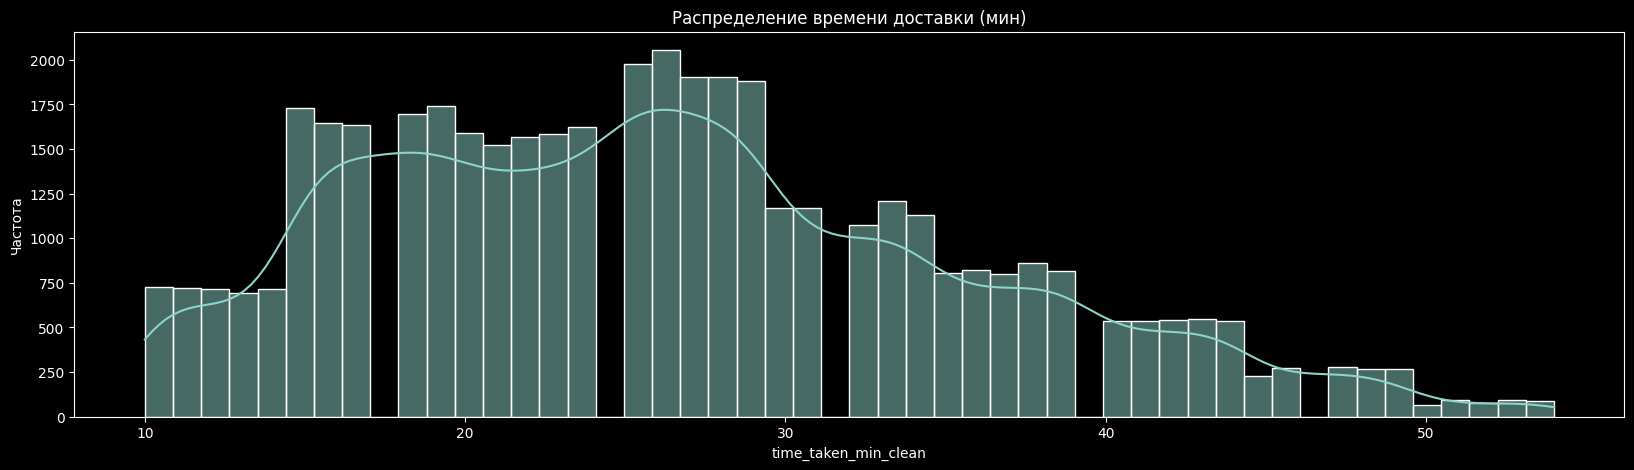

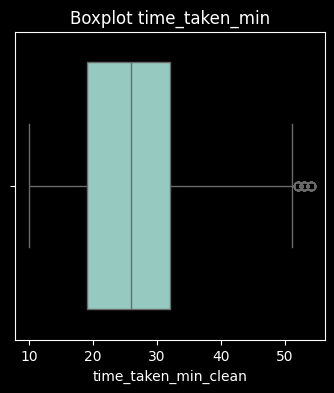

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')
plt.figure(figsize=(20,5))
sns.histplot(df['time_taken_min_clean'], bins=50, kde=True)
plt.title("Распределение времени доставки (мин)")
plt.xlabel("time_taken_min_clean")
plt.ylabel("Частота")
plt.show()

plt.figure(figsize=(4,4))
sns.boxplot(x=df['time_taken_min_clean'])
plt.title("Boxplot time_taken_min")
plt.show()

	1.	Правосторонний перекос:
Гистограмма показывает, что большинство доставок укладывается в 15–35 минут, но есть хвост  до 50–55 минут.

	2.	Медиана и IQR:
– Медиана чуть больше 25 минут.
– IQR простираются примерно от 20 до 32 минут половина всех доставок длится в этом коридоре.

	3.	Выбросы:
– На боксплоте усы выходят примерно от 10 до 50 минут.
– Точки за усами  — аномалии (> 50 минут или < 10 минут).

Зависимость таргета от категорий

In [ ]:
df

,id,delivery_person_id,delivery_person_age,delivery_person_ratings,restaurant_latitude,restaurant_longitude,delivery_location_latitude,delivery_location_longitude,weather_conditions,road_traffic_density,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city,datetime_order,datetime_picked,time_to_pick_min,time_taken_min_clean
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,conditions sunny,high,2,snack,motorcycle,0,no,urban,2022-03-19 11:30:00,2022-03-19 11:45:00,15.0,24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,conditions stormy,jam,2,snack,scooter,1,no,metropolitian,2022-03-25 19:45:00,2022-03-25 19:50:00,5.0,33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,conditions sandstorms,low,0,drinks,motorcycle,1,no,urban,2022-03-19 08:30:00,2022-03-19 08:45:00,15.0,26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,conditions sunny,medium,0,buffet,motorcycle,1,no,metropolitian,2022-04-05 18:00:00,2022-04-05 18:10:00,10.0,21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,conditions cloudy,high,1,snack,scooter,1,no,metropolitian,2022-03-26 13:30:00,2022-03-26 13:45:00,15.0,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,conditions windy,high,1,meal,motorcycle,0,no,metropolitian,2022-03-24 11:35:00,2022-03-24 11:45:00,10.0,32
45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,conditions windy,jam,0,buffet,motorcycle,1,no,metropolitian,2022-02-16 19:55:00,2022-02-16 20:10:00,15.0,36
45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,conditions cloudy,low,1,drinks,scooter,0,no,metropolitian,2022-03-11 23:50:00,2022-03-12 00:05:00,15.0,16
45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,conditions cloudy,high,0,snack,motorcycle,1,no,metropolitian,2022-03-07 13:35:00,2022-03-07 13:40:00,5.0,26


Посмотрим как категориальные перемеенные влияют на таргет

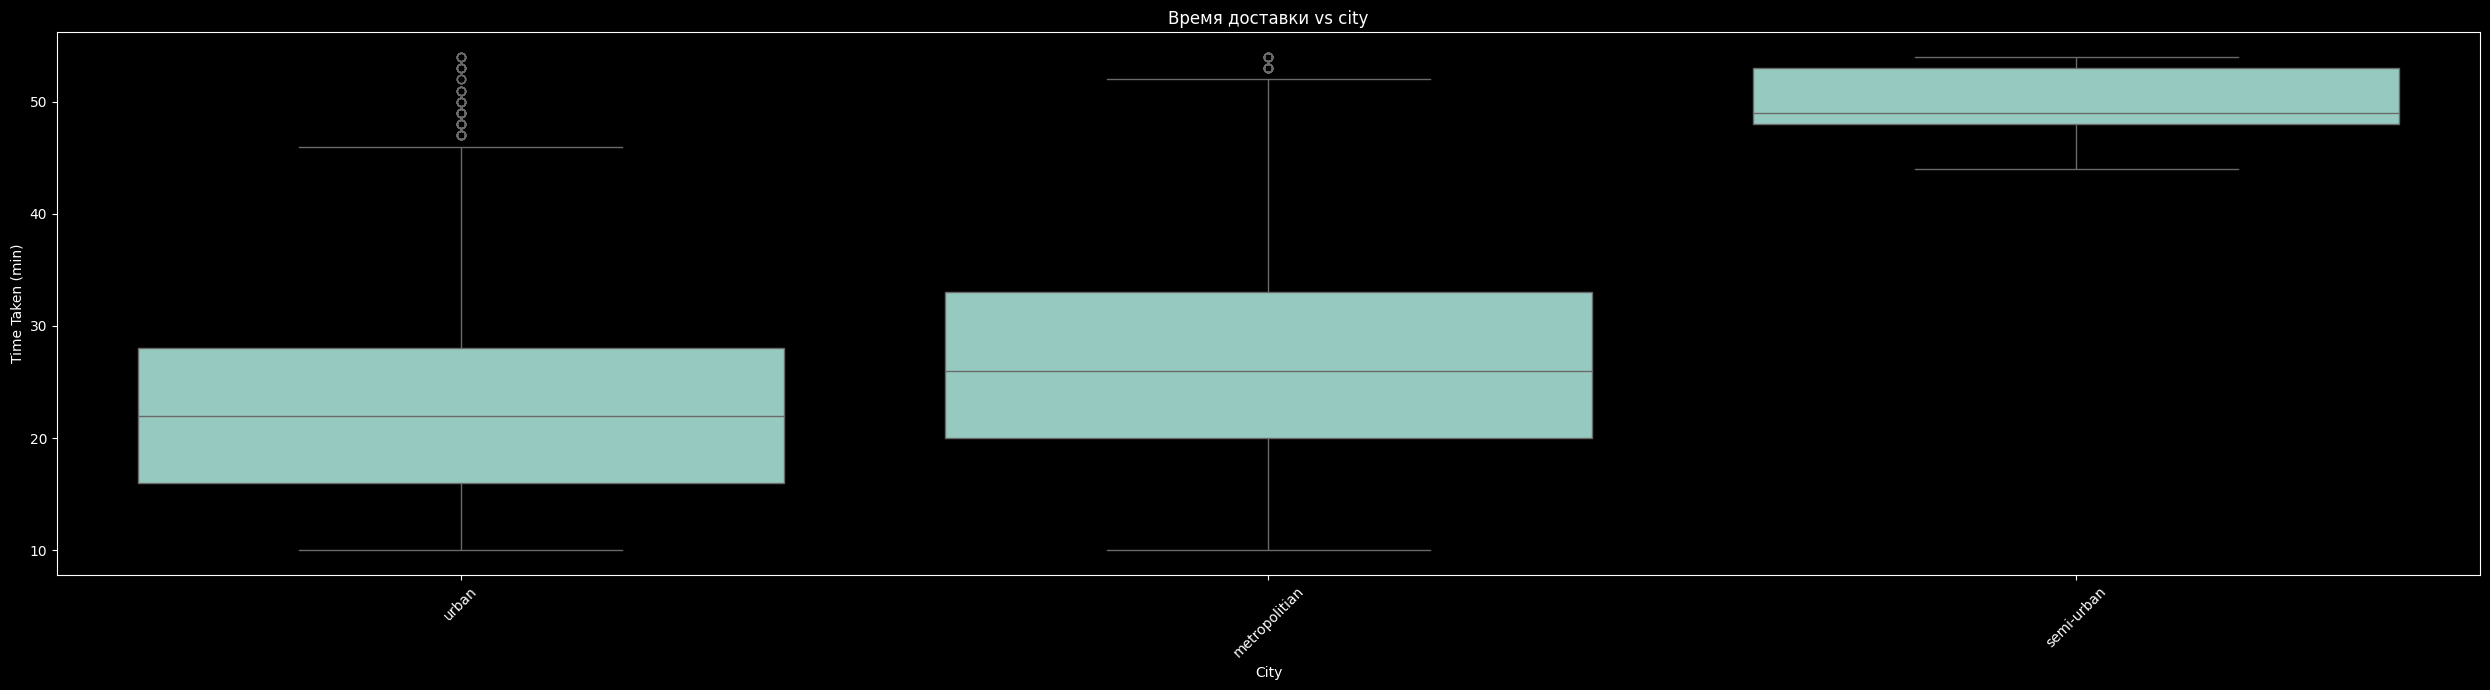

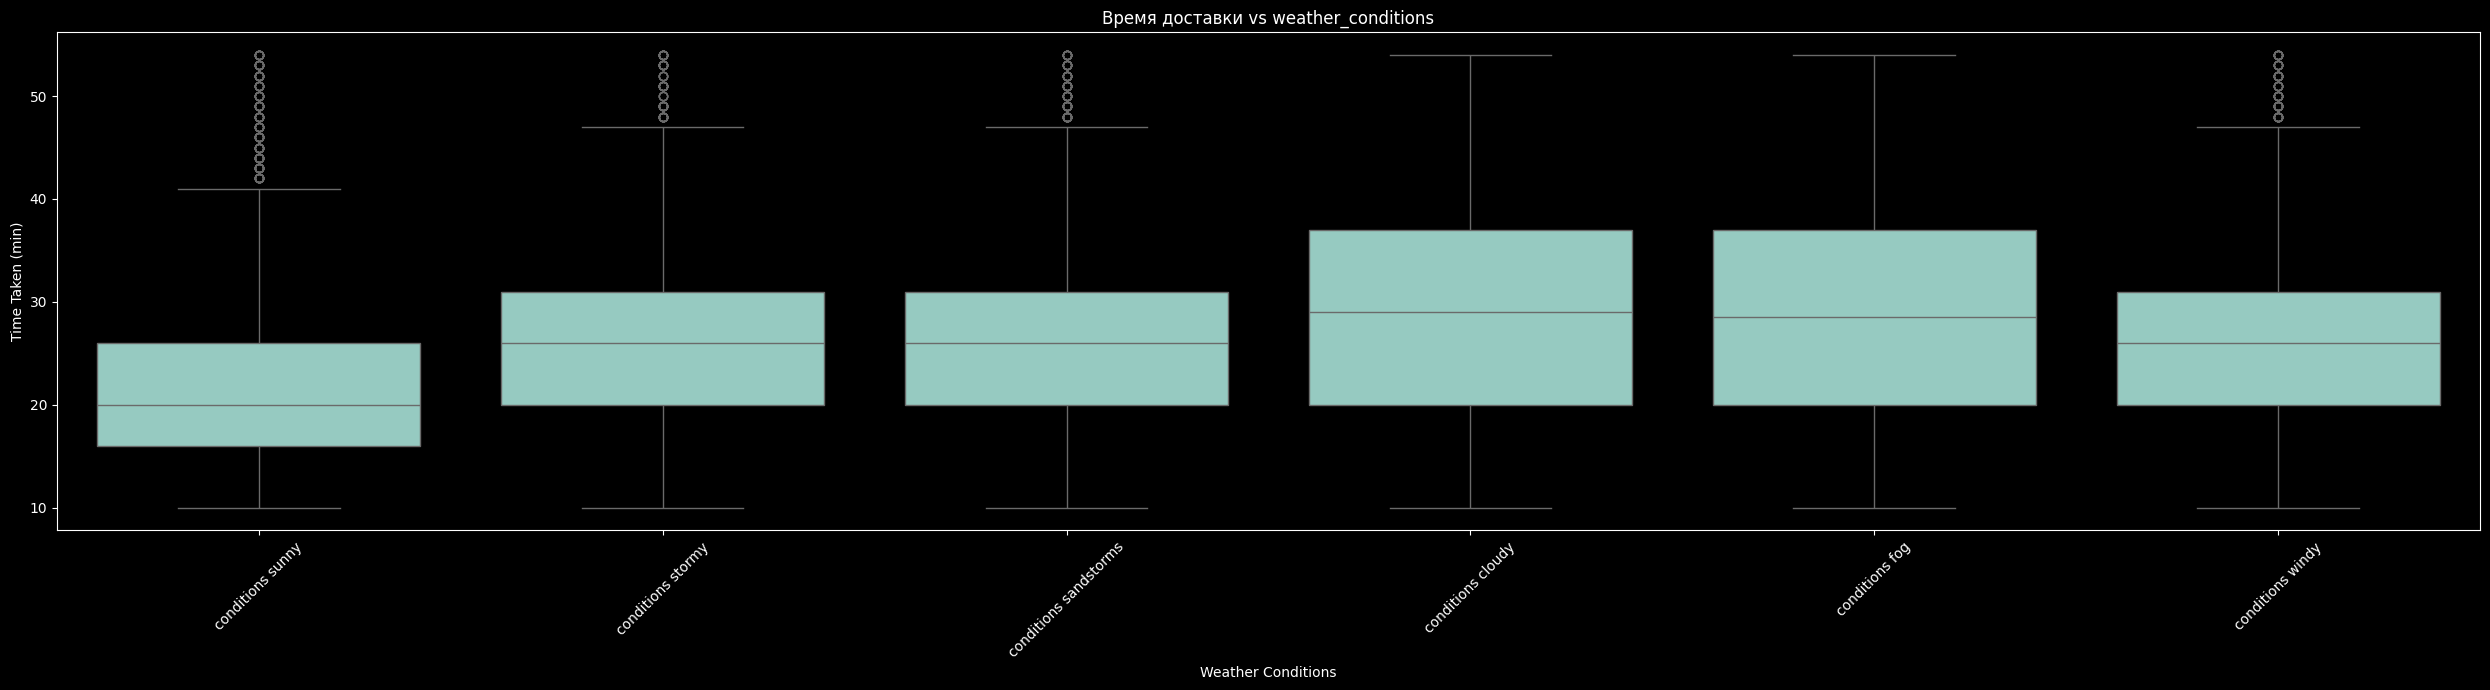

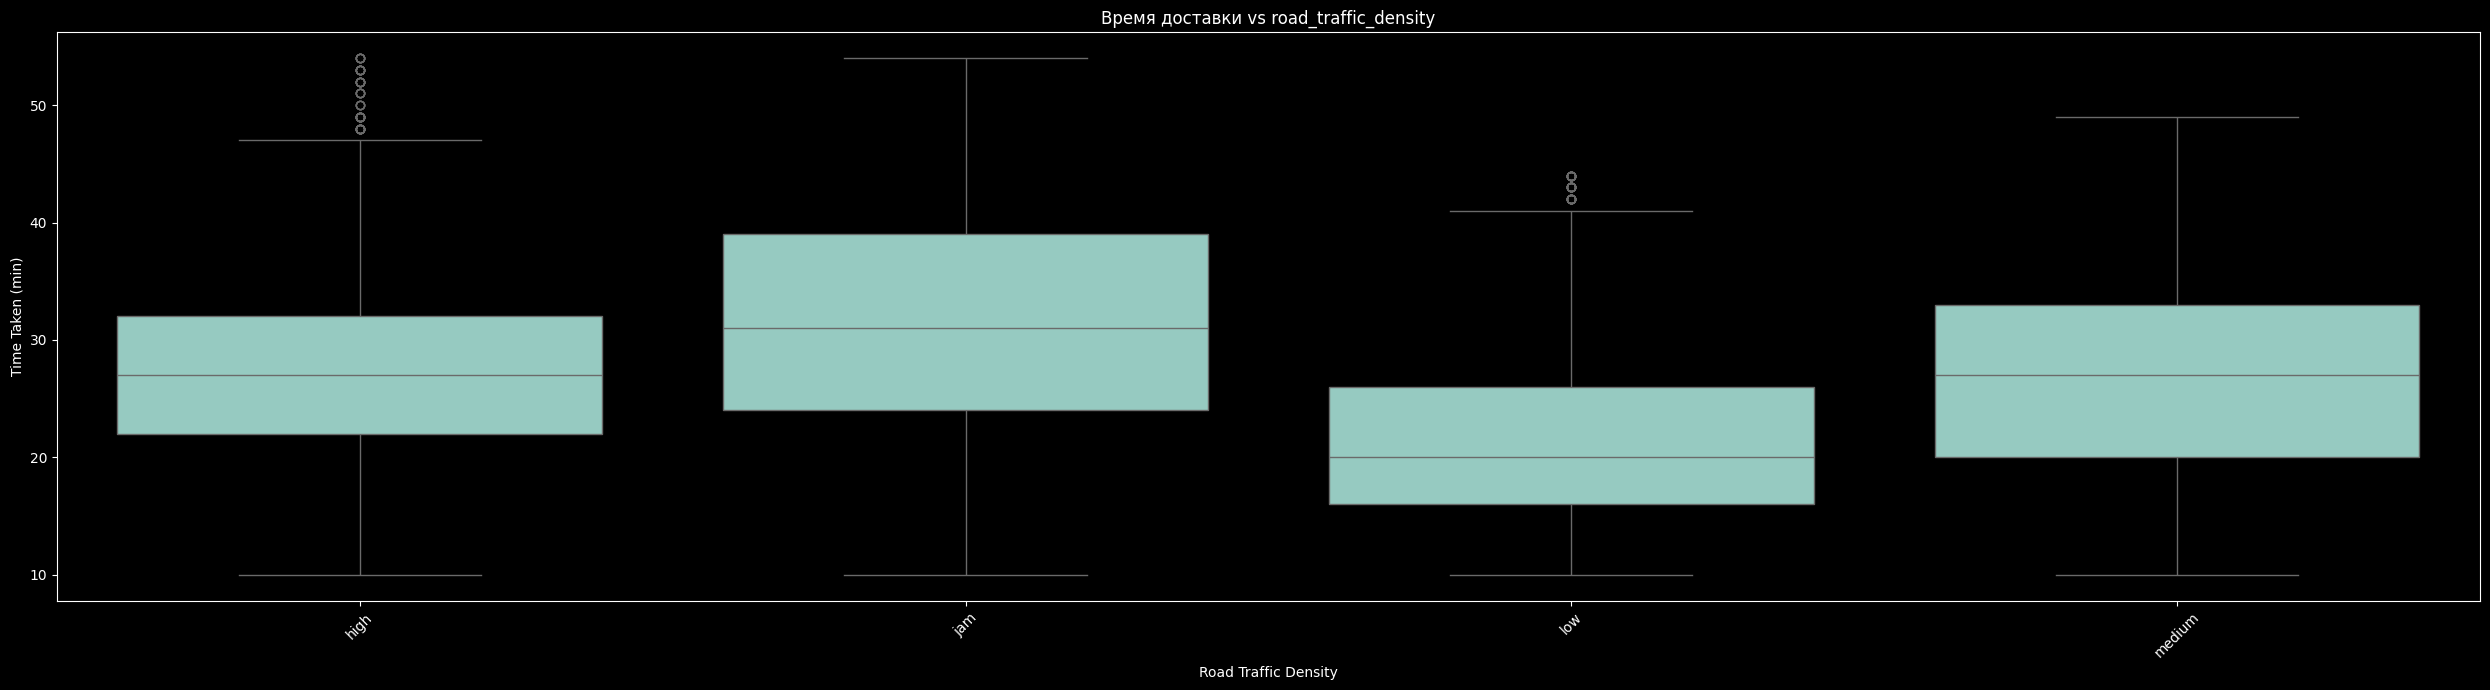

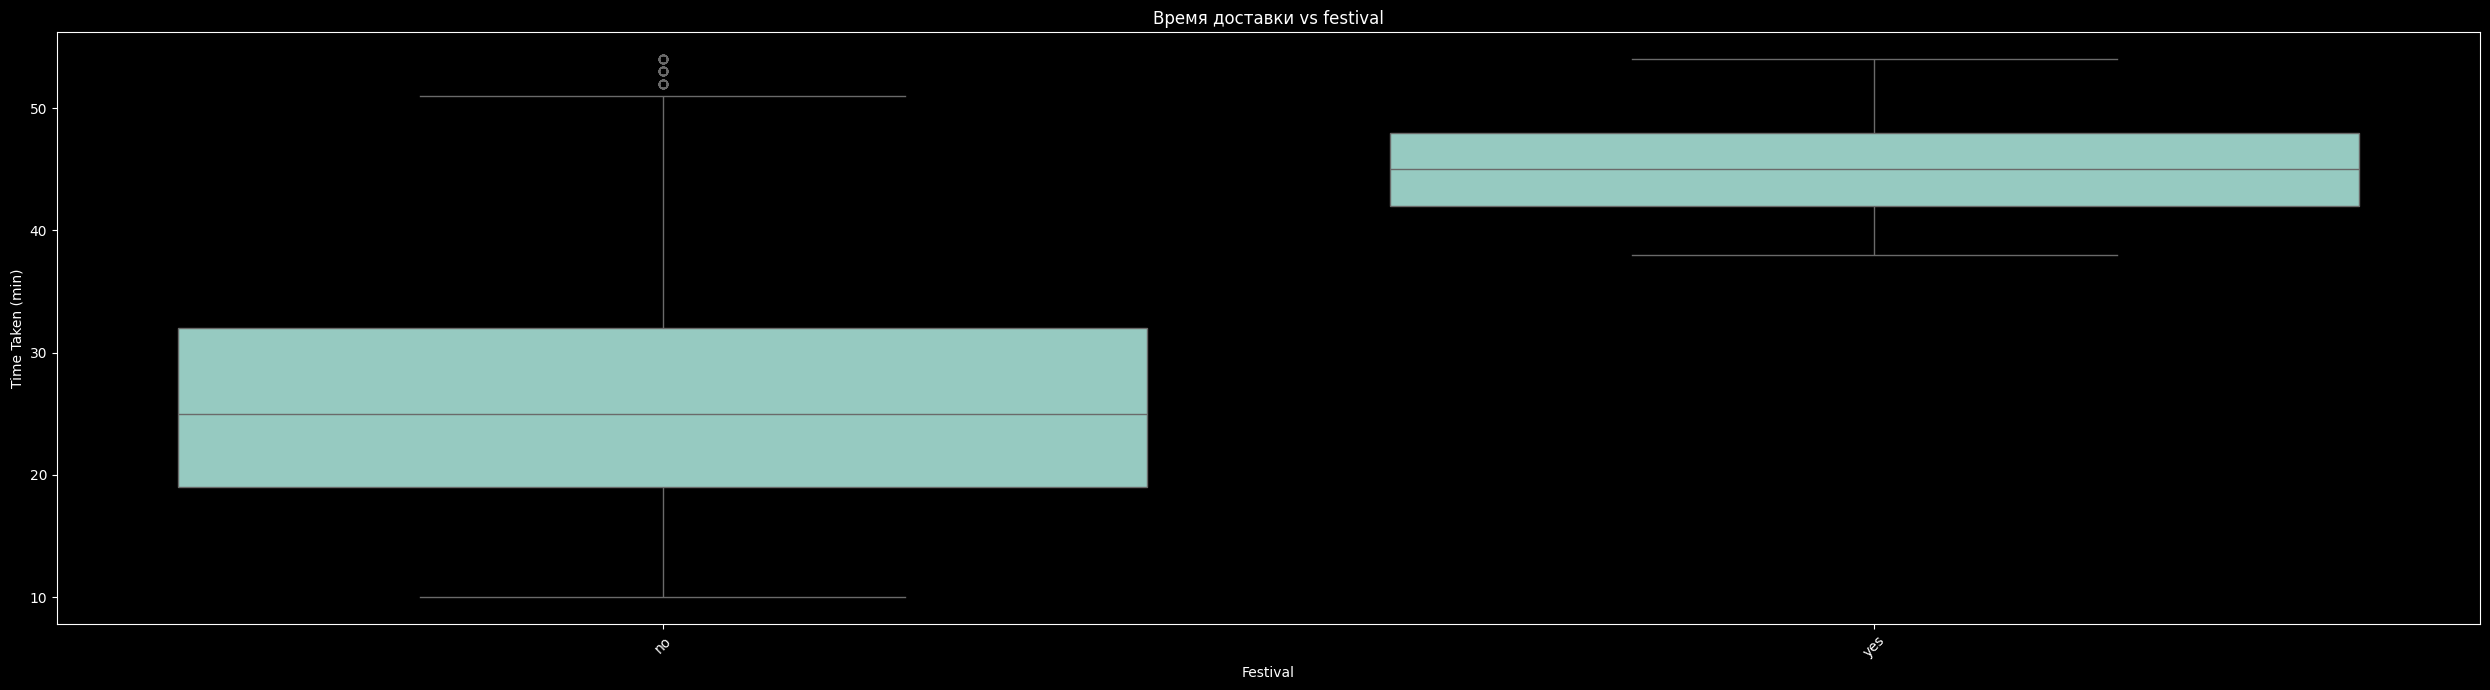

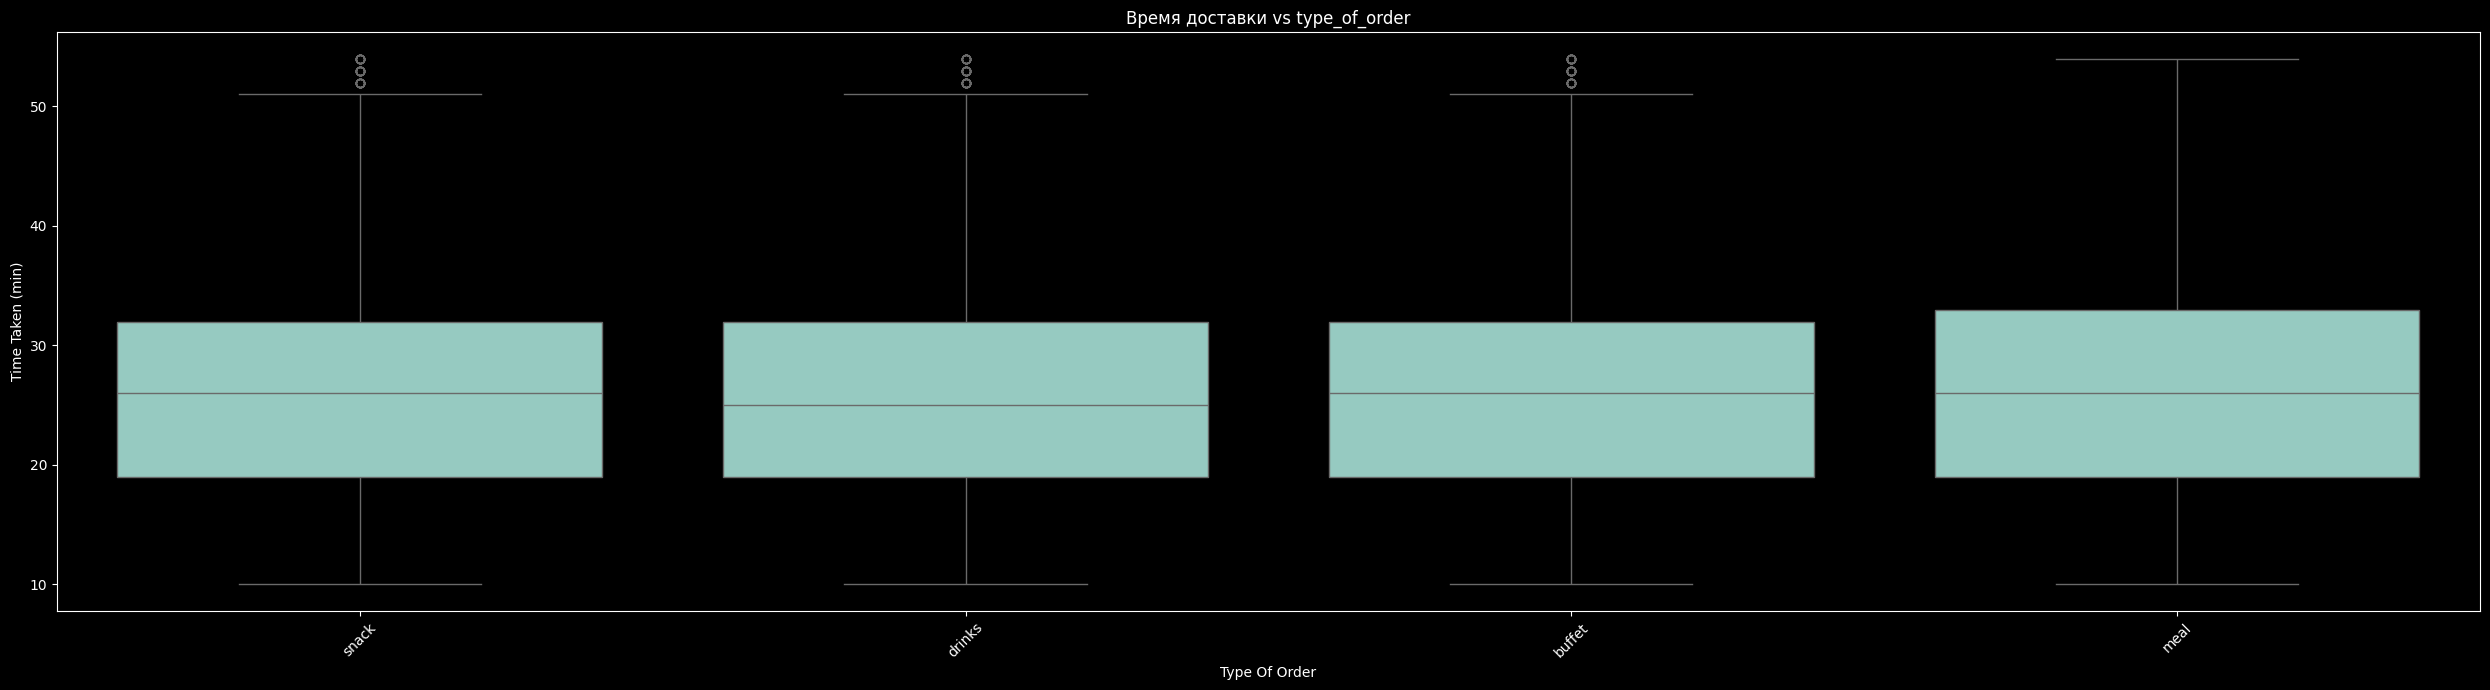

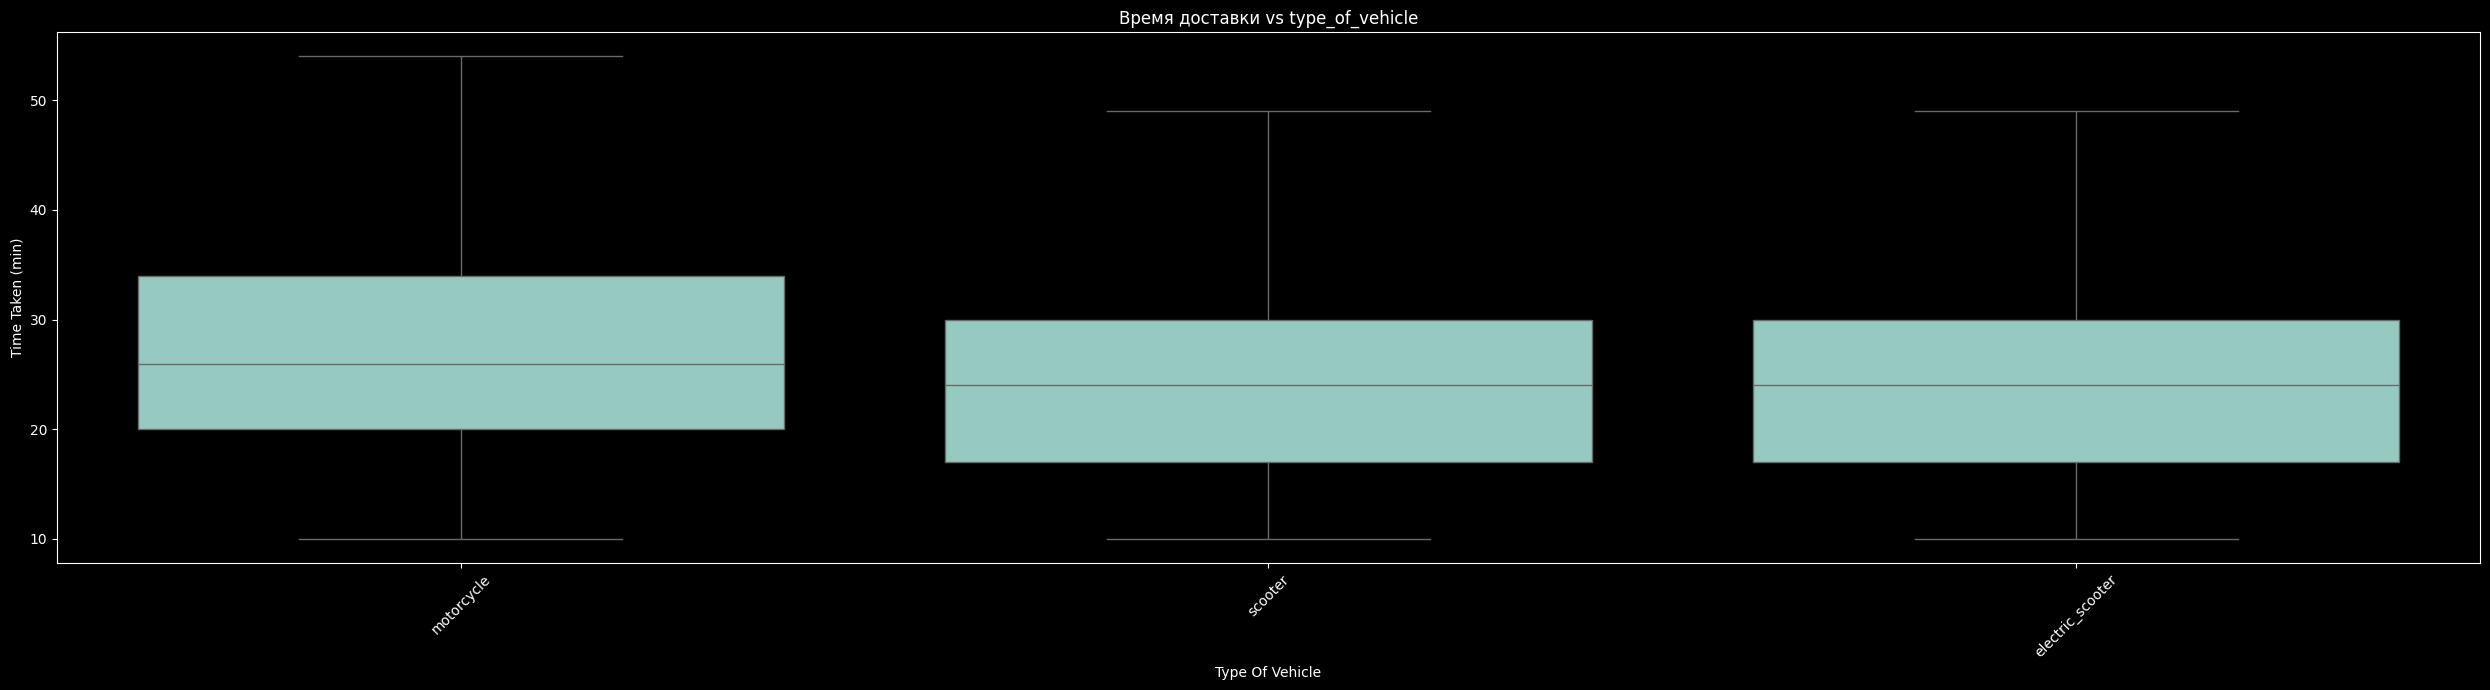

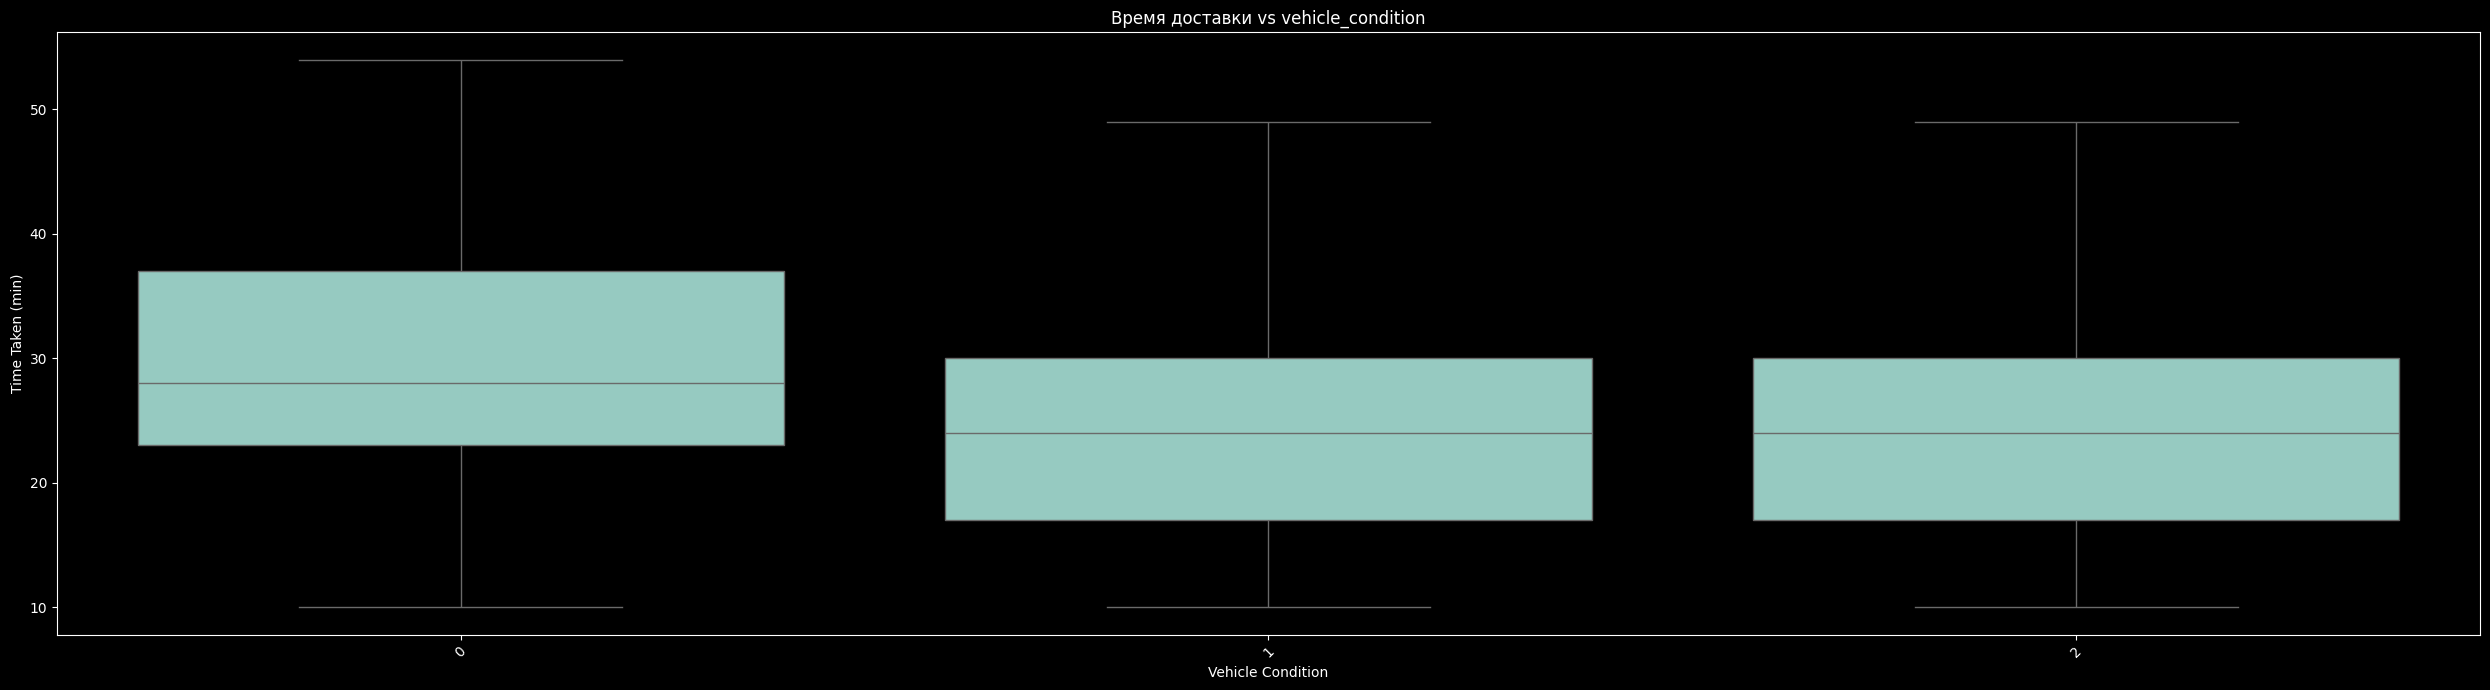

In [ ]:
categ_col = ['city', 'weather_conditions', 'road_traffic_density', 'festival', 'type_of_order', 'type_of_vehicle', 'vehicle_condition']

for col in categ_col:
    plt.figure(figsize=(25, 7))
    sns.boxplot(x=col, y='time_taken_min_clean', data=df)
    plt.title(f'Время доставки vs {col}')
    plt.xlabel(col.replace('_', ' ').title())
    plt.ylabel('Time Taken (min)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

1. City

  Semi-urban:
Медиана примерно 48 мин — самая высока из всех трёх категорий,большой разброс и длинный хвост, доставка в пригород дольше.

  Metropolitan:
Медиана примерно 26 минут, хвосты в обе стороны, но в среднем дольше, чем в urban.

  Urban:
Медиана примерно 22 мин — самая низкая, более узкий IQR чем у метрополитан,следовательно предсказуемее.

Вывод: доставка быстрее всего в центре городов, дольше всего — в пригородах.

2. Weather Conditions

Cloudy и Fog: самые высокие медианы (примерно 30 – 32 мин), при плохой погоде курьеры довтавляют медленнее.

Stormy и Sandstorms: медианы чуть выше среднего (прмиерно 25 – 28 мин),есть экстремальные задержки (выбросы > 50 мин).

Sunny: медиана  примерно 20 мин, ссамые оптимальные условия условия.

Windy: около 25 – 27 мин, хвосты умеренные.

Вывод: погодные условия ощутимо влияют на доставку: средне туман и облачность, самые быстрые доставки при ясной погоде.

3. Road Traffic Density

Jam: медиана примерно 31 мин, огромный разброс и выбросы до 55 мин.

High: медиана примерно 27 мин, правый хвост.

Medium: медиана примерно 27 – 28 мин, более сглаженный график

Low: медиана примерно 20 мин — самый быстрый трафик.

Вывод: чем хуже трафик, тем дольше доставка

4. Festival

праздник: медиана примерно 45 мин, IQR примерно 42–48 мин.

обычный день: медиана примерно 25 мин, IQR в районе 20–30 мин.

Вывод: заметна сильная разница, в праздничные дни время доставки почти вдвое больше.

5. Type of order

Не выявлено зависимости между видом заказа и временем доставки

6. Type of vehicle

Не выявлено существенной зависимости между видом заказа и видом транспорта, на мотоцикле медиана и 1 и 3 квартии чуть выше

Анализ числовых признаков
Для начала вычислим растояние между рестораном и местом доставки

In [ ]:
import numpy as np

df['dist_deg'] = np.sqrt((df['restaurant_latitude']   - df['delivery_location_latitude'])**2 + (df['restaurant_longitude']  - df['delivery_location_longitude'])**2)

df['dist_km'] = df['dist_deg'] * 111 #(1° ≈ 111 км)



/tmp/ipython-input-3963876775.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dist_deg'] = np.sqrt((df['restaurant_latitude']   - df['delivery_location_latitude'])**2 + (df['restaurant_longitude']  - df['delivery_location_longitude'])**2)
/tmp/ipython-input-3963876775.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dist_km'] = df['dist_deg'] * 111 #(1° ≈ 111 км)


In [ ]:
df

,id,delivery_person_id,delivery_person_age,delivery_person_ratings,restaurant_latitude,restaurant_longitude,delivery_location_latitude,delivery_location_longitude,weather_conditions,road_traffic_density,...,type_of_vehicle,multiple_deliveries,festival,city,datetime_order,datetime_picked,time_to_pick_min,time_taken_min_clean,dist_deg,dist_km
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,conditions sunny,high,...,motorcycle,0,no,urban,2022-03-19 11:30:00,2022-03-19 11:45:00,15.0,24,0.028284,3.139554
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,conditions stormy,jam,...,scooter,1,no,metropolitian,2022-03-25 19:45:00,2022-03-25 19:50:00,5.0,33,0.183848,20.407102
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,conditions sandstorms,low,...,motorcycle,1,no,urban,2022-03-19 08:30:00,2022-03-19 08:45:00,15.0,26,0.014142,1.569777
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,conditions sunny,medium,...,motorcycle,1,no,metropolitian,2022-04-05 18:00:00,2022-04-05 18:10:00,10.0,21,0.070711,7.848885
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,conditions cloudy,high,...,scooter,1,no,metropolitian,2022-03-26 13:30:00,2022-03-26 13:45:00,15.0,30,0.056569,6.279108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,conditions windy,high,...,motorcycle,0,no,metropolitian,2022-03-24 11:35:00,2022-03-24 11:45:00,10.0,32,0.014142,1.569777
45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,conditions windy,jam,...,motorcycle,1,no,metropolitian,2022-02-16 19:55:00,2022-02-16 20:10:00,15.0,36,0.098995,10.988439
45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,conditions cloudy,low,...,scooter,0,no,metropolitian,2022-03-11 23:50:00,2022-03-12 00:05:00,15.0,16,0.042426,4.709331
45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,conditions cloudy,high,...,motorcycle,1,no,metropolitian,2022-03-07 13:35:00,2022-03-07 13:40:00,5.0,26,0.056569,6.279108


In [ ]:
df['datetime_order'].dt.month.value_counts()

,count
datetime_order,
3,30766
2,6970
4,6126


/tmp/ipython-input-2419843336.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['order_hour']=df['datetime_order'].dt.hour


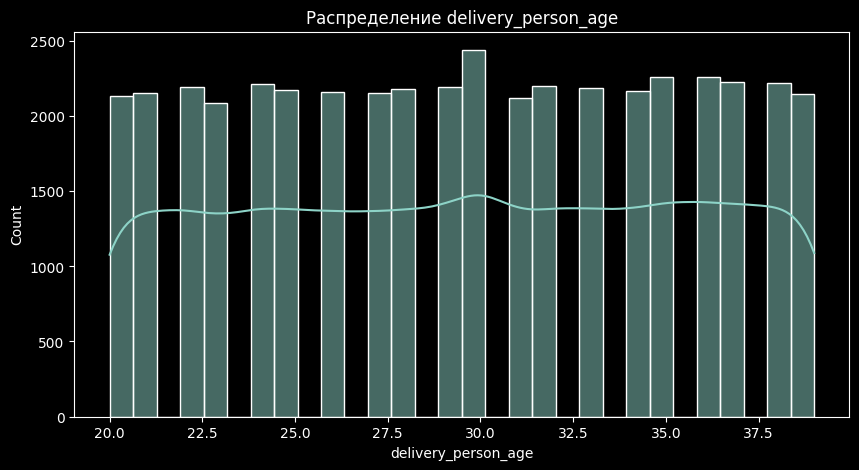

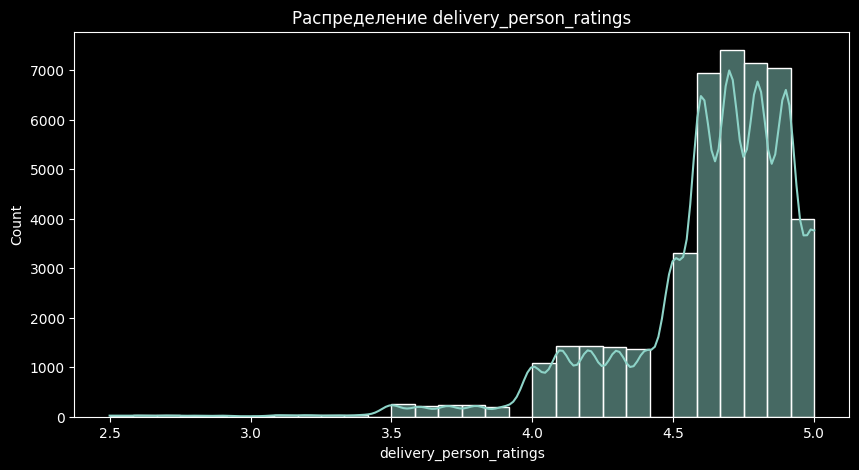

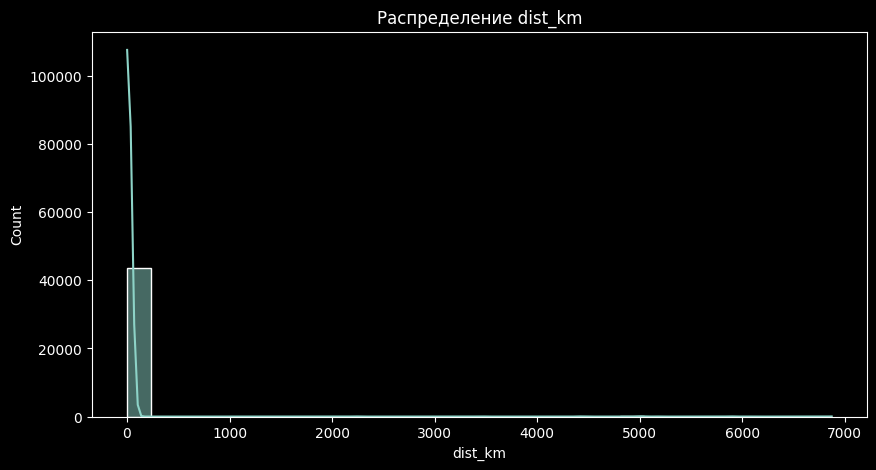

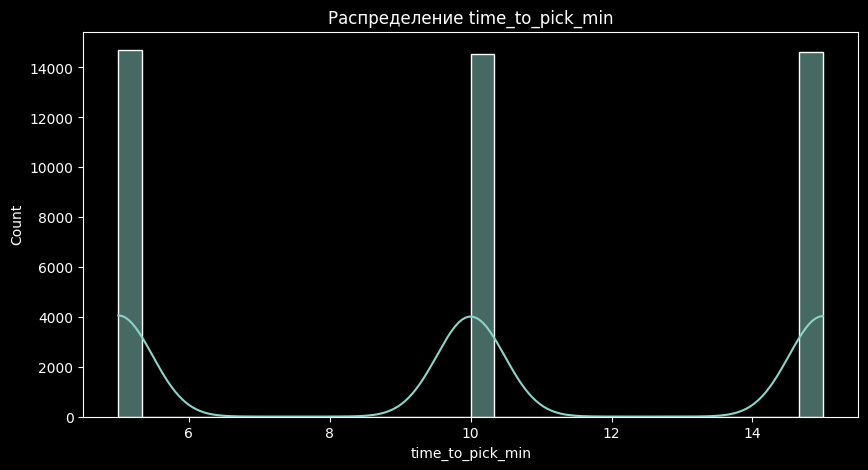

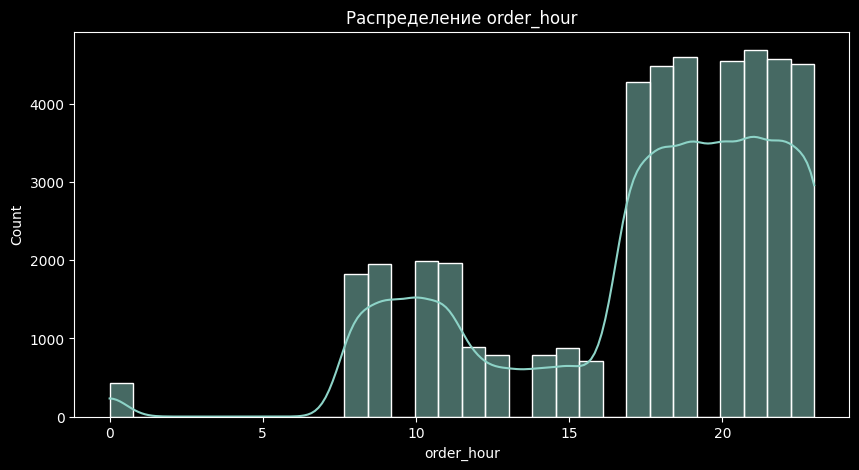

In [ ]:
num_col = ['delivery_person_age', 'delivery_person_ratings', 'dist_km', 'time_to_pick_min', 'order_hour']
df['order_hour']=df['datetime_order'].dt.hour
for col in num_col:
    plt.figure(figsize=(10,5))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Распределение {col}')
    plt.show()


	1.Возраст курьера :
	Распределение почти равномерное от 20 до 40 лет, с лёгким пиком у 30 лет.
	Нет выраженных экстремумов следовательно оставляем признак без транформации
	2.Рейтинг курьера
	Явно скошен вправо, большинство оценок находятся в диапазоне 4.3–5.0.
	Немного значений у 3.5–4.0. Оставим признак как есть

	3.Расстояние
	Большинство доставок на небольшие дистанции (0–10 км).Есть выбросы до 6 000+ км.Применим логарифм к растоянию и удалим выбросы
	4.Время до выезда
	В основном все заказы забираются через 5, 10 или 15 минут после оформления заказа. Аномалий нет

	5.Час заказа и час выезда
	Явные пики в рабочее время: утром около 9–12 часови и вечером с 18 до 22.
	Есть редкие заказы ровно в 12 часов ночи. Оставим признак как есть


Посомтрим еще раз на распределение растояния. Видим, что сильно смещено, есть выбросы справа, удалим их

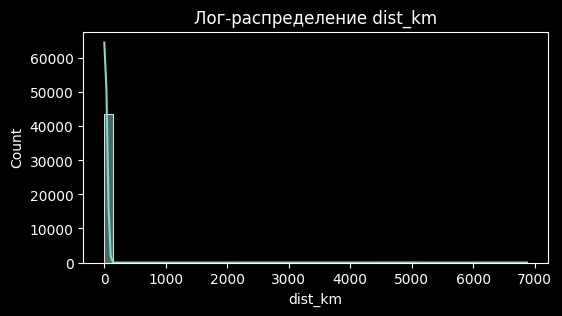

In [ ]:
plt.figure(figsize=(6,3))
sns.histplot(df['dist_km'], bins=50, kde=True)
plt.title("Лог-распределение dist_km")
plt.show()

In [ ]:
thr = 50
n_before = len(df)
n_far = (df['dist_km'] > thr).sum()
print(f"Найдено {n_far} строк с dist_km > {thr} км") #удаляем выбросы... берем 50 км

Найдено 156 строк с dist_km > 50 км


In [ ]:
df = df[df['dist_km'] <= thr].copy()
n_after = len(df)
print(f"Удалили {n_before - n_after} строк; осталось {n_after}")

Удалили 156 строк; осталось 43706


Посмотрим нараспределение после удаления

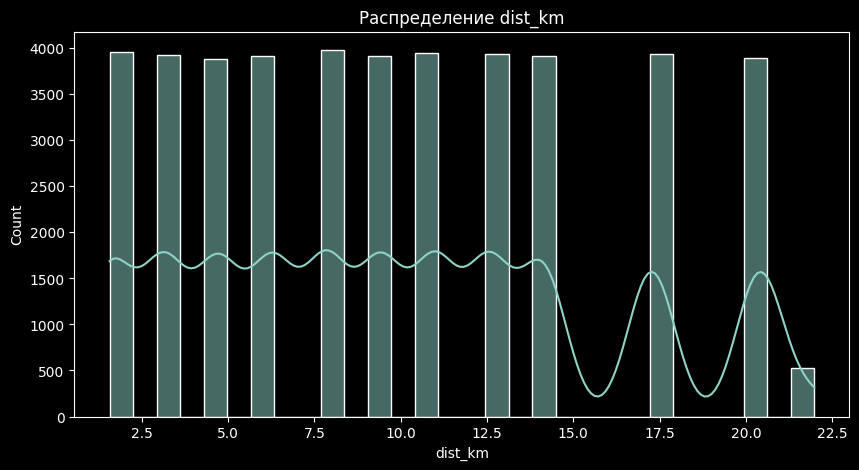

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df['dist_km'], bins=30, kde=True)
plt.title('Распределение dist_km')
plt.show()

# Корреляции с таргетом

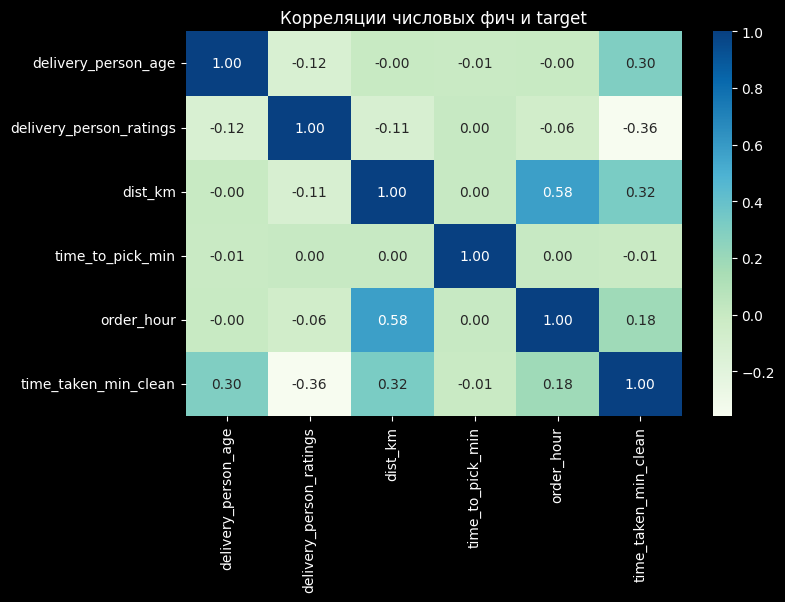

In [ ]:
corr = df[num_col + ['time_taken_min_clean']].corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='GnBu')
plt.title("Корреляции числовых фич и target")
plt.show()

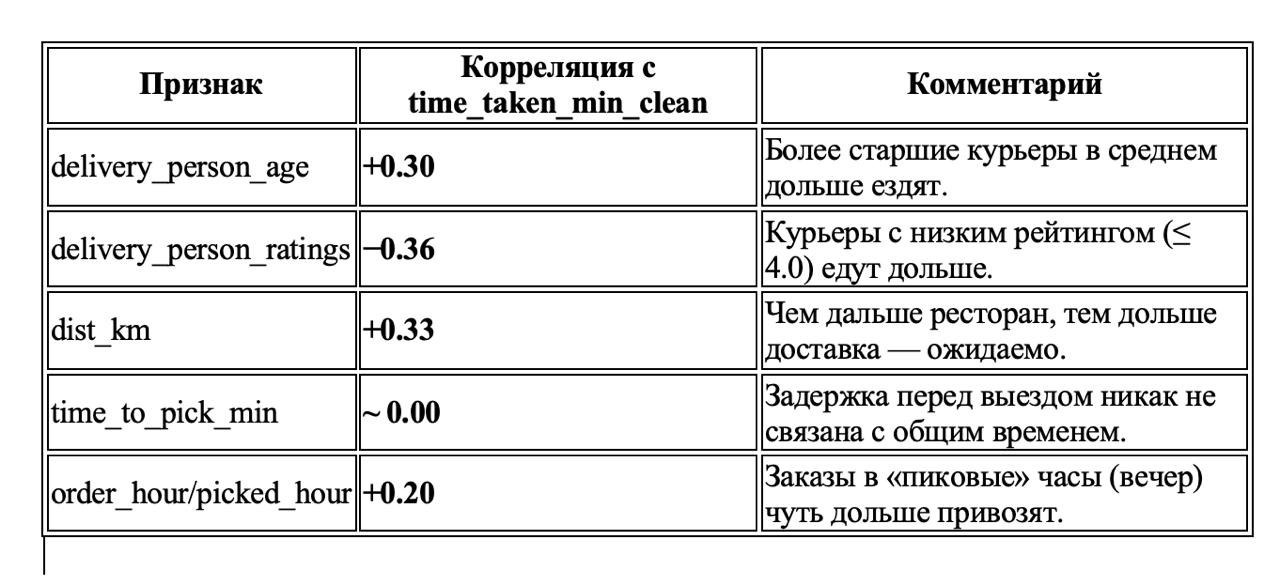

# Финальный отбор признаков

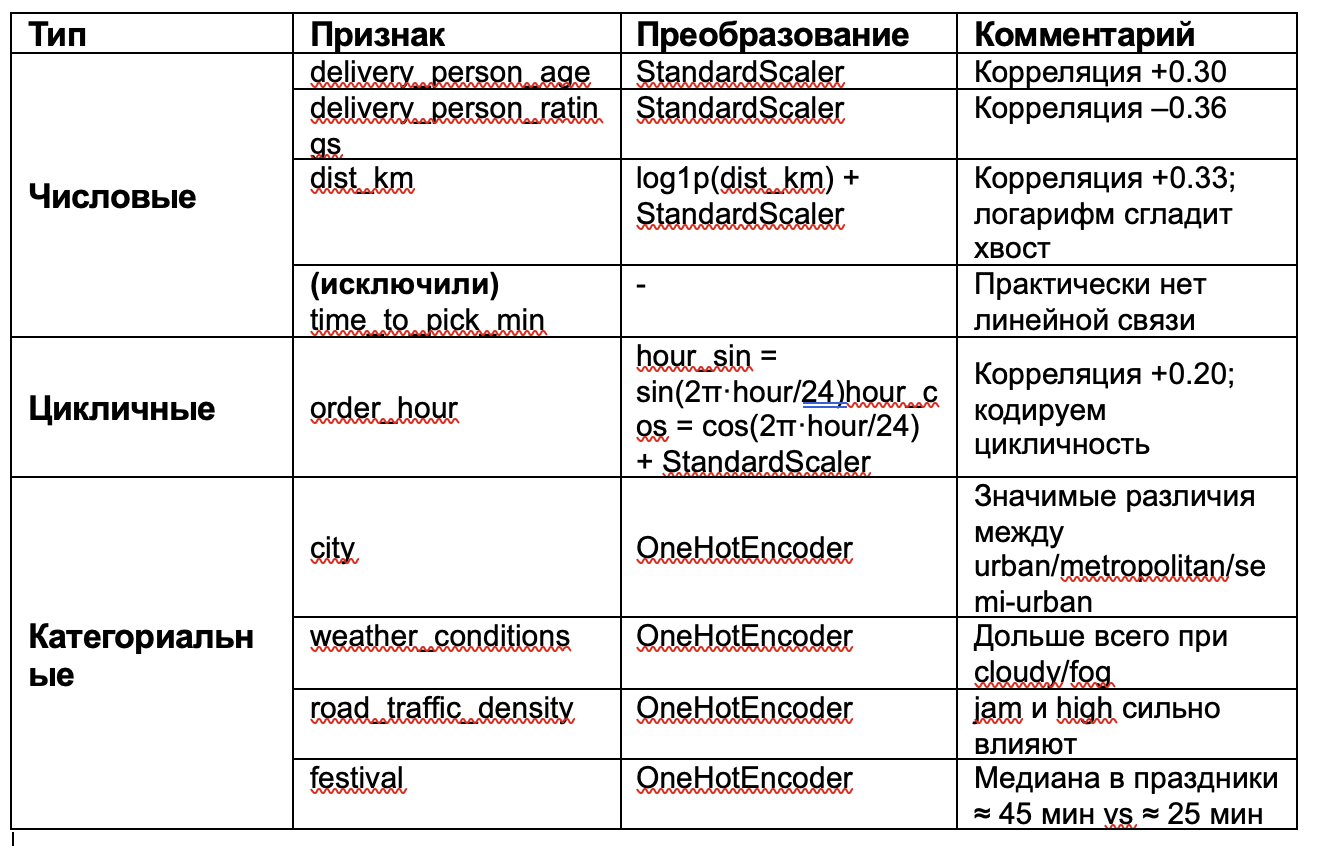

Логарифмируем растояние, чтобы сделать его распределние более нормальным и кодируем временные переменные с помощью синуса и косинуса чтобы 23 часа и 1 имели близкое значение

In [ ]:
df['dist_km_log'] = np.log1p(df['dist_km'])
df['hour_sin'] = np.sin(2 * np.pi * df['order_hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['order_hour'] / 24)

Посмотрим на категориальные переменные и удалим лишние признаки

In [ ]:
num_feats = ['delivery_person_age','delivery_person_ratings','dist_km_log']
cyc_feats = ['hour_sin','hour_cos']
cat_feats = ['city','weather_conditions','road_traffic_density','festival','type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'vehicle_condition']

In [ ]:
df.drop(['id', 'delivery_person_id', 'restaurant_latitude', 'restaurant_longitude', 'delivery_location_latitude', 'delivery_location_longitude', 'dist_km', 'datetime_order', 'datetime_picked', 'dist_deg', 'time_to_pick_min', 'order_hour'], axis=1, inplace=True)

In [ ]:
df

,delivery_person_age,delivery_person_ratings,weather_conditions,road_traffic_density,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city,time_taken_min_clean,dist_km_log,hour_sin,hour_cos
0,37,4.9,conditions sunny,high,2,snack,motorcycle,0,no,urban,24,1.420588,0.258819,-9.659258e-01
1,34,4.5,conditions stormy,jam,2,snack,scooter,1,no,metropolitian,33,3.063723,-0.965926,2.588190e-01
2,23,4.4,conditions sandstorms,low,0,drinks,motorcycle,1,no,urban,26,0.943819,0.866025,-5.000000e-01
3,38,4.7,conditions sunny,medium,0,buffet,motorcycle,1,no,metropolitian,21,2.180291,-1.000000,-1.836970e-16
4,32,4.6,conditions cloudy,high,1,snack,scooter,1,no,metropolitian,30,1.985008,-0.258819,-9.659258e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,30,4.8,conditions windy,high,1,meal,motorcycle,0,no,metropolitian,32,0.943819,0.258819,-9.659258e-01
45589,21,4.6,conditions windy,jam,0,buffet,motorcycle,1,no,metropolitian,36,2.483943,-0.965926,2.588190e-01
45590,30,4.9,conditions cloudy,low,1,drinks,scooter,0,no,metropolitian,16,1.742102,-0.258819,9.659258e-01
45591,20,4.7,conditions cloudy,high,0,snack,motorcycle,1,no,metropolitian,26,1.985008,-0.258819,-9.659258e-01


Закодируем категориальные признаки. Закодируем festival в 0 и 1, остальные закодируем используя one hot метод

In [ ]:
df_cat=df.copy() #сохраним датасет с категориальными признаками для последующего обучения catboost

In [ ]:
df_cat

,delivery_person_age,delivery_person_ratings,weather_conditions,road_traffic_density,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city,time_taken_min_clean,dist_km_log,hour_sin,hour_cos
0,37,4.9,conditions sunny,high,2,snack,motorcycle,0,no,urban,24,1.420588,0.258819,-9.659258e-01
1,34,4.5,conditions stormy,jam,2,snack,scooter,1,no,metropolitian,33,3.063723,-0.965926,2.588190e-01
2,23,4.4,conditions sandstorms,low,0,drinks,motorcycle,1,no,urban,26,0.943819,0.866025,-5.000000e-01
3,38,4.7,conditions sunny,medium,0,buffet,motorcycle,1,no,metropolitian,21,2.180291,-1.000000,-1.836970e-16
4,32,4.6,conditions cloudy,high,1,snack,scooter,1,no,metropolitian,30,1.985008,-0.258819,-9.659258e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,30,4.8,conditions windy,high,1,meal,motorcycle,0,no,metropolitian,32,0.943819,0.258819,-9.659258e-01
45589,21,4.6,conditions windy,jam,0,buffet,motorcycle,1,no,metropolitian,36,2.483943,-0.965926,2.588190e-01
45590,30,4.9,conditions cloudy,low,1,drinks,scooter,0,no,metropolitian,16,1.742102,-0.258819,9.659258e-01
45591,20,4.7,conditions cloudy,high,0,snack,motorcycle,1,no,metropolitian,26,1.985008,-0.258819,-9.659258e-01


In [ ]:
df['festival']=df['festival'].replace({'yes': 1, 'no':0}) #заменяем строковые значения числовыми

/tmp/ipython-input-349125174.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['festival']=df['festival'].replace({'yes': 1, 'no':0}) #заменяем строковые значения числовыми


In [ ]:
for category in cat_feats:
  print(f'Количество уникальных значения для {category}: {df[category].nunique()}') #смотрим сколько уникальных значений в каждой категории. Мы видим что не сильно много, можем все их закодировать

Количество уникальных значения для city: 3
Количество уникальных значения для weather_conditions: 6
Количество уникальных значения для road_traffic_density: 4
Количество уникальных значения для festival: 2
Количество уникальных значения для type_of_order: 4
Количество уникальных значения для type_of_vehicle: 3
Количество уникальных значения для multiple_deliveries: 4
Количество уникальных значения для vehicle_condition: 3


In [ ]:
df

,delivery_person_age,delivery_person_ratings,weather_conditions,road_traffic_density,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city,time_taken_min_clean,dist_km_log,hour_sin,hour_cos
0,37,4.9,conditions sunny,high,2,snack,motorcycle,0,0,urban,24,1.420588,0.258819,-9.659258e-01
1,34,4.5,conditions stormy,jam,2,snack,scooter,1,0,metropolitian,33,3.063723,-0.965926,2.588190e-01
2,23,4.4,conditions sandstorms,low,0,drinks,motorcycle,1,0,urban,26,0.943819,0.866025,-5.000000e-01
3,38,4.7,conditions sunny,medium,0,buffet,motorcycle,1,0,metropolitian,21,2.180291,-1.000000,-1.836970e-16
4,32,4.6,conditions cloudy,high,1,snack,scooter,1,0,metropolitian,30,1.985008,-0.258819,-9.659258e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,30,4.8,conditions windy,high,1,meal,motorcycle,0,0,metropolitian,32,0.943819,0.258819,-9.659258e-01
45589,21,4.6,conditions windy,jam,0,buffet,motorcycle,1,0,metropolitian,36,2.483943,-0.965926,2.588190e-01
45590,30,4.9,conditions cloudy,low,1,drinks,scooter,0,0,metropolitian,16,1.742102,-0.258819,9.659258e-01
45591,20,4.7,conditions cloudy,high,0,snack,motorcycle,1,0,metropolitian,26,1.985008,-0.258819,-9.659258e-01


In [ ]:
df = pd.get_dummies(df, #используем one hot encoding
    columns=['city','weather_conditions','road_traffic_density','type_of_order', 'type_of_vehicle', 'multiple_deliveries'],
    drop_first=True
)
df.replace({False: 0, True:1}, inplace=True)  #кодирование категориальных признаков


/tmp/ipython-input-3259189126.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({False: 0, True:1}, inplace=True)  #кодирование категориальных признаков


In [ ]:
df

,delivery_person_age,delivery_person_ratings,vehicle_condition,festival,time_taken_min_clean,dist_km_log,hour_sin,hour_cos,city_semi-urban,city_urban,...,road_traffic_density_low,road_traffic_density_medium,type_of_order_drinks,type_of_order_meal,type_of_order_snack,type_of_vehicle_motorcycle,type_of_vehicle_scooter,multiple_deliveries_1,multiple_deliveries_2,multiple_deliveries_3
0,37,4.9,2,0,24,1.420588,0.258819,-9.659258e-01,0,1,...,0,0,0,0,1,1,0,0,0,0
1,34,4.5,2,0,33,3.063723,-0.965926,2.588190e-01,0,0,...,0,0,0,0,1,0,1,1,0,0
2,23,4.4,0,0,26,0.943819,0.866025,-5.000000e-01,0,1,...,1,0,1,0,0,1,0,1,0,0
3,38,4.7,0,0,21,2.180291,-1.000000,-1.836970e-16,0,0,...,0,1,0,0,0,1,0,1,0,0
4,32,4.6,1,0,30,1.985008,-0.258819,-9.659258e-01,0,0,...,0,0,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,30,4.8,1,0,32,0.943819,0.258819,-9.659258e-01,0,0,...,0,0,0,1,0,1,0,0,0,0
45589,21,4.6,0,0,36,2.483943,-0.965926,2.588190e-01,0,0,...,0,0,0,0,0,1,0,1,0,0
45590,30,4.9,1,0,16,1.742102,-0.258819,9.659258e-01,0,0,...,1,0,1,0,0,0,1,0,0,0
45591,20,4.7,0,0,26,1.985008,-0.258819,-9.659258e-01,0,0,...,0,0,0,0,1,1,0,1,0,0


In [ ]:
y=df['time_taken_min_clean'] #создание X и y
X=df.drop(['time_taken_min_clean'], axis=1)

In [ ]:
np.random.seed(2025)#устанавливаем seed для воспроизводимости результатов случайных операций

Разделим на test и train, установим размер тестовой выборки 0.2

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=13)

In [ ]:
X_train

,delivery_person_age,delivery_person_ratings,vehicle_condition,festival,dist_km_log,hour_sin,hour_cos,city_semi-urban,city_urban,weather_conditions_conditions fog,...,road_traffic_density_low,road_traffic_density_medium,type_of_order_drinks,type_of_order_meal,type_of_order_snack,type_of_vehicle_motorcycle,type_of_vehicle_scooter,multiple_deliveries_1,multiple_deliveries_2,multiple_deliveries_3
7889,36,4.7,2,0,2.343599,-0.965926,-2.588190e-01,0,1,1,...,0,1,1,0,0,0,1,0,0,0
42237,24,4.8,1,0,2.343599,-0.965926,-2.588190e-01,0,1,0,...,0,1,1,0,0,1,0,0,0,0
36179,28,4.5,2,0,0.943819,0.866025,-5.000000e-01,0,1,0,...,1,0,0,1,0,0,1,1,0,0
8450,23,4.6,2,0,2.716547,-0.258819,9.659258e-01,0,1,1,...,1,0,1,0,0,0,1,1,0,0
30214,38,4.7,0,0,2.180291,-0.707107,7.071068e-01,0,0,0,...,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,36,4.8,2,0,2.905126,-1.000000,-1.836970e-16,0,1,1,...,0,1,1,0,0,1,0,1,0,0
23163,23,4.9,0,0,2.905126,-0.866025,5.000000e-01,0,0,0,...,0,0,0,0,1,1,0,1,0,0
35086,38,4.6,1,0,2.180291,-0.965926,-2.588190e-01,0,1,0,...,0,1,0,1,0,1,0,1,0,0
34267,32,4.1,1,0,2.180291,-0.707107,7.071068e-01,0,0,0,...,0,0,0,0,0,1,0,0,0,0


Масштабируем данные используя Standard scaler. Мы масштабируем данные после разделения на train-test, обучаем на обучающие и трансформируем на обучающей и тестовой выборках

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
X_train_scaled=pd.DataFrame(X_train, columns=X.columns)

In [ ]:
X_test_scaled=pd.DataFrame(X_test, columns=X.columns)

In [ ]:
X_train_scaled

,delivery_person_age,delivery_person_ratings,vehicle_condition,festival,dist_km_log,hour_sin,hour_cos,city_semi-urban,city_urban,weather_conditions_conditions fog,...,road_traffic_density_low,road_traffic_density_medium,type_of_order_drinks,type_of_order_meal,type_of_order_snack,type_of_vehicle_motorcycle,type_of_vehicle_scooter,multiple_deliveries_1,multiple_deliveries_2,multiple_deliveries_3
0,1.122465,0.205904,1.223251,-0.136984,0.185027,-0.857249,-0.570457,-0.057695,1.865086,2.209354,...,-0.720956,1.753720,1.739081,-0.576205,-0.583956,-1.185958,1.406032,-1.326824,-0.21238,-0.087722
1,-0.965821,0.524721,-0.002559,-0.136984,0.185027,-0.857249,-0.570457,-0.057695,1.865086,-0.452621,...,-0.720956,1.753720,1.739081,-0.576205,-0.583956,0.843200,-0.711221,-1.326824,-0.21238,-0.087722
2,-0.269726,-0.431731,1.223251,-0.136984,-2.064716,2.401112,-0.935792,-0.057695,1.865086,-0.452621,...,1.387047,-0.570217,-0.575016,1.735492,-0.583956,-1.185958,1.406032,0.753680,-0.21238,-0.087722
3,-1.139845,-0.112914,1.223251,-0.136984,0.784434,0.400431,1.284761,-0.057695,1.865086,2.209354,...,1.387047,-0.570217,1.739081,-0.576205,-0.583956,-1.185958,1.406032,0.753680,-0.21238,-0.087722
4,1.470512,0.205904,-1.228369,-0.136984,-0.077442,-0.396906,0.892708,-0.057695,-0.536168,-0.452621,...,-0.720956,-0.570217,-0.575016,1.735492,-0.583956,0.843200,-0.711221,0.753680,-0.21238,-0.087722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34959,1.122465,0.524721,1.223251,-0.136984,1.087521,-0.917854,-0.178403,-0.057695,1.865086,2.209354,...,-0.720956,1.753720,1.739081,-0.576205,-0.583956,0.843200,-0.711221,0.753680,-0.21238,-0.087722
34960,-1.139845,0.843538,-1.228369,-0.136984,1.087521,-0.679563,0.578987,-0.057695,-0.536168,-0.452621,...,-0.720956,-0.570217,-0.575016,-0.576205,1.712459,0.843200,-0.711221,0.753680,-0.21238,-0.087722
34961,1.470512,-0.112914,-0.002559,-0.136984,-0.077442,-0.857249,-0.570457,-0.057695,1.865086,-0.452621,...,-0.720956,1.753720,-0.575016,1.735492,-0.583956,0.843200,-0.711221,0.753680,-0.21238,-0.087722
34962,0.426369,-1.707000,-0.002559,-0.136984,-0.077442,-0.396906,0.892708,-0.057695,-0.536168,-0.452621,...,-0.720956,-0.570217,-0.575016,-0.576205,-0.583956,0.843200,-0.711221,-1.326824,-0.21238,-0.087722


Создадим функцию для автоматического получения метрик наших моделей. Посмотрим на 5 метрик: MSE, MAE, R2, RMSE, MAPE. Для обучения возьмем за основу метрику RMSE, которую мы будем пытаться оптимизировать, на остальные метрики посмотрим дополнительно

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error #создаем функцию для оценки метрик наших моделей
def model_evaluation(model, name, y_pred, y_test=y_test):
  print(name)
  mse=mean_squared_error(y_test, y_pred)
  mae=mean_absolute_error(y_test, y_pred)
  r_2=r2_score(y_test, y_pred)
  rmse=np.sqrt(mse)
  mape=mean_absolute_percentage_error(y_test, y_pred)
  print(f'MSE: {mse}')
  print(f'MAE: {mae}')
  print(f'R2: {r_2}')
  print(f'RMSE: {rmse}')
  print(f'MAPE: {mape}')
  print('------------')


В качестве baseline посмотрим на среднее нашего таргета

In [ ]:
from sklearn.dummy import DummyRegressor

dummy_model = DummyRegressor(strategy='mean')  # всегда предсказывает среднее
dummy_model.fit(X_train_scaled, y_train)

y_pred_dummy_test=dummy_model.predict(X_test_scaled)
y_pred_dummy_train=dummy_model.predict(X_train_scaled)

model_evaluation(dummy_model, 'dummy_train', y_pred_dummy_train, y_train)
model_evaluation(dummy_model, 'dummy_test', y_pred_dummy_test)

dummy_train
MSE: 87.13498657242441
MAE: 7.5497165692423005
R2: 0.0
RMSE: 9.334612288275524
MAPE: 0.34301819346133705
------------
dummy_test
MSE: 91.06052840914528
MAE: 7.723286855092788
R2: -0.0004713751250644549
RMSE: 9.542564037466308
MAPE: 0.3453373726821068
------------


RMSE около 9.5 минут, MAE 7 минут

In [ ]:
from sklearn.neighbors import KNeighborsRegressor #создаем модель KNN с параметром 7


In [ ]:
model_knn=KNeighborsRegressor(n_neighbors=7)
model_knn.fit(X_train_scaled, y_train)
y_pred_knn_test=model_knn.predict(X_test_scaled)
y_pred_knn_train=model_knn.predict(X_train_scaled)

In [ ]:
model_evaluation(model_knn, 'KNN_train', y_pred_knn_train, y_train) #метрики и сравниваем с обучением на train, чтобы оценить, переобучилась ли модель
model_evaluation(model_knn, 'KNN_test', y_pred_knn_test)
#видим, что значения на train лучше чем на test, модель немного переобучилась

KNN_train
MSE: 18.902293087467225
MAE: 3.377281938973965
R2: 0.7830688471873911
RMSE: 4.347676745972178
MAPE: 0.1472629091080377
------------
KNN_test
MSE: 26.71237142763763
MAE: 4.021799522829036
R2: 0.7065142994231066
RMSE: 5.168401244837482
MAPE: 0.17437076214521108
------------


Видим, что качество лучше чем у baseline, RMSE=5 vs 7.5 у baseline.

Используем дальше более сложные модели: Linear Regression с Ridge регуляризацией, Decision Tree, Random Forest, Gradient Boosting с подбором гиперпараметров с использованием Grid Search, Randomized Search и Optuna

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge #создаем модель LinearRegressor
model_l_r=Ridge(alpha=2)
model_l_r.fit(X_train_scaled, y_train)

Ridge(alpha=2)

In [ ]:
y_pred_l_r_train=model_l_r.predict(X_train_scaled)
y_pred_l_r_test=model_l_r.predict(X_test_scaled)

In [ ]:
model_evaluation(model_l_r, 'LinearRegressor_train', y_pred_l_r_train, y_train) #модель не переобучена, но метрики хуже чем у KNN
model_evaluation(model_l_r, 'LinearRegressor_test', y_pred_l_r_test)
#качество хуже чем у KNN (возможно связано с отсусттвием сильных корреляций признаков с таргетом), но модель не переобучена

LinearRegressor_train
MSE: 34.699430866251014
MAE: 4.692133884393922
R2: 0.6017738427329679
RMSE: 5.890622281750122
MAPE: 0.20929817758356067
------------
LinearRegressor_test
MSE: 35.5230365779038
MAE: 4.743719905350351
R2: 0.6097125519189928
RMSE: 5.960120517062034
MAPE: 0.2087362736675944
------------


In [ ]:
from sklearn.tree import DecisionTreeRegressor  #создаем модель дереа решений и получаем лучшие гиперпараметры с помощью GridSearchCV
from sklearn.model_selection import GridSearchCV
# grid=GridSearchCV(DecisionTreeRegressor(), param_grid={'max_depth':range(1, 20), 'min_samples_leaf': range(1, 20)}, scoring=['neg_root_mean_squared_error'], refit='neg_root_mean_squared_error', cv=3, n_jobs=-1, return_train_score=True, verbose=5)

In [ ]:
# grid.fit(X_train, y_train)

In [ ]:
# print(grid.best_score_)

In [ ]:
model_dt=DecisionTreeRegressor(max_depth=13, min_samples_leaf=17)
model_dt.fit(X_train, y_train)  #обучаем модель)

DecisionTreeRegressor(max_depth=13, min_samples_leaf=17)

In [ ]:
y_pred_dt_train=model_dt.predict(X_train)
y_pred_dt_test=model_dt.predict(X_test)
#получаем  метрики, сравниваем с обученим на train, видим что есть разница между train и test, но не большая,модель в целом не переобучена,
#в то же время значения метрик лучше чем baseline, KNN и Linear Regressor

In [ ]:
model_evaluation(model_dt, 'DecisionTreeRegressor_train', y_pred_dt_train, y_train)
model_evaluation(model_dt, 'DecisionTreeRegressor_test', y_pred_dt_test)

DecisionTreeRegressor_train
MSE: 12.853635532431454
MAE: 2.8641398124375455
R2: 0.852485941204021
RMSE: 3.5851967215804845
MAPE: 0.12315678121217317
------------
DecisionTreeRegressor_test
MSE: 15.504198164315914
MAE: 3.13971890540941
R2: 0.8296571881510539
RMSE: 3.937537068310077
MAPE: 0.13445307509644405
------------


In [ ]:
from sklearn.ensemble import RandomForestRegressor #создаем модель RandomForest для регрессии и получаем лучшие гиперпарамерты с помощью RandomizedSearchCV
# from sklearn.model_selection import RandomizedSearchCV
# r_grid=RandomizedSearchCV(RandomForestRegressor(),
#                           param_distributions={'n_estimators':[100, 200, 300], 'max_depth': [None, 5, 10], 'min_samples_split': [2, 5, 10], 'max_features':[5, 10, 20], 'min_samples_leaf':[10,15]},
#                           n_iter=30, cv=3,  scoring='neg_root_mean_squared_error',
#                           n_jobs=-1)

In [ ]:
# r_grid.fit(X_train, y_train)

In [ ]:
# print(r_grid.best_score_)

In [ ]:
model_rf=RandomForestRegressor(max_features=10, min_samples_leaf=10, n_estimators=300)
model_rf.fit(X_train, y_train)

RandomForestRegressor(max_features=10, min_samples_leaf=10, n_estimators=300)

In [ ]:
y_pred_rf_train=model_rf.predict(X_train)
y_pred_rf_test=model_rf.predict(X_test)
#обучаем

In [ ]:
model_evaluation(model_rf, 'RandomForestRegressor_train', y_pred_rf_train, y_train)
model_evaluation(model_rf, 'RandomForestRegressor_test', y_pred_rf_test)
#есть небольшие различия между предсказаниями на обучающей и тестовой выбоке, но они не критичны
#в целом метрики немного лучше чем у дерева

RandomForestRegressor_train
MSE: 11.767143385775372
MAE: 2.7697317593148996
R2: 0.8649550100521928
RMSE: 3.4303270085773705
MAPE: 0.12019774217085269
------------
RandomForestRegressor_test
MSE: 14.380919880702779
MAE: 3.053062887426316
R2: 0.8419985152736593
RMSE: 3.7922183324147856
MAPE: 0.13156241707802854
------------


Обучим CatBoostRegressor, для подбора гиперпараметров используем Optuna

In [ ]:
!pip install catboost
import catboost
from catboost import CatBoostRegressor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.7 MB/s eta 0:00:00


In [ ]:
!pip install optuna.integration
from optuna.integration import OptunaSearchCV

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 18.0 MB/s eta 0:00:00


In [ ]:
!pip install optuna.distributions
from optuna.distributions import IntDistribution, FloatDistribution

In [ ]:
X_cat = df_cat.drop(['time_taken_min_clean'], axis=1)
y_cat = df_cat['time_taken_min_clean']

In [ ]:
df_cat

,delivery_person_age,delivery_person_ratings,weather_conditions,road_traffic_density,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city,time_taken_min_clean,dist_km_log,hour_sin,hour_cos
0,37,4.9,conditions sunny,high,2,snack,motorcycle,0,no,urban,24,1.420588,0.258819,-9.659258e-01
1,34,4.5,conditions stormy,jam,2,snack,scooter,1,no,metropolitian,33,3.063723,-0.965926,2.588190e-01
2,23,4.4,conditions sandstorms,low,0,drinks,motorcycle,1,no,urban,26,0.943819,0.866025,-5.000000e-01
3,38,4.7,conditions sunny,medium,0,buffet,motorcycle,1,no,metropolitian,21,2.180291,-1.000000,-1.836970e-16
4,32,4.6,conditions cloudy,high,1,snack,scooter,1,no,metropolitian,30,1.985008,-0.258819,-9.659258e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,30,4.8,conditions windy,high,1,meal,motorcycle,0,no,metropolitian,32,0.943819,0.258819,-9.659258e-01
45589,21,4.6,conditions windy,jam,0,buffet,motorcycle,1,no,metropolitian,36,2.483943,-0.965926,2.588190e-01
45590,30,4.9,conditions cloudy,low,1,drinks,scooter,0,no,metropolitian,16,1.742102,-0.258819,9.659258e-01
45591,20,4.7,conditions cloudy,high,0,snack,motorcycle,1,no,metropolitian,26,1.985008,-0.258819,-9.659258e-01


In [ ]:

X_cat_train, X_cat_val, y_cat_train, y_cat_val = train_test_split(X_cat, y_cat, test_size=0.2, random_state=42, stratify=y, shuffle=True)

In [ ]:
X_cat_train

,delivery_person_age,delivery_person_ratings,weather_conditions,road_traffic_density,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city,dist_km_log,hour_sin,hour_cos
27767,20,4.7,conditions windy,low,2,buffet,motorcycle,0,no,metropolitian,2.483936,-2.588190e-01,9.659258e-01
29570,36,4.5,conditions stormy,low,0,buffet,motorcycle,1,no,urban,2.716547,-2.588190e-01,9.659258e-01
12483,33,5.0,conditions fog,medium,0,drinks,motorcycle,1,no,metropolitian,3.134488,-9.659258e-01,-2.588190e-01
35962,36,4.9,conditions sunny,jam,2,meal,motorcycle,0,no,metropolitian,2.180291,-8.660254e-01,5.000000e-01
26505,38,4.1,conditions stormy,jam,0,snack,motorcycle,1,no,semi-urban,2.716547,-7.071068e-01,7.071068e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,24,4.8,conditions windy,jam,2,meal,scooter,1,no,metropolitian,2.905126,-7.071068e-01,7.071068e-01
35101,32,4.7,conditions sandstorms,medium,1,drinks,motorcycle,1,no,urban,3.063723,-9.659258e-01,-2.588190e-01
39448,26,4.8,conditions windy,jam,1,buffet,motorcycle,1,no,metropolitian,2.716547,-7.071068e-01,7.071068e-01
2998,20,4.9,conditions stormy,high,0,snack,motorcycle,1,no,urban,1.985008,1.224647e-16,-1.000000e+00


In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
#теперь подберем гиперпараметры с помощью Optuna
# cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
# searcher = OptunaSearchCV(
#     CatBoostRegressor(random_state=42, verbose=0, cat_features=cat_feats),
#     param_distributions={
#         'iterations': IntDistribution(low=50, high=500),
#         'depth': IntDistribution(low=2, high=7),
#         'learning_rate': FloatDistribution(low=0.01, high=0.3),
#         'l2_leaf_reg': FloatDistribution(low=1, high=10),
#         'random_strength': FloatDistribution(low=0.1, high=10)
#     },
#     cv=cv,
#     n_trials=15,
#     scoring='neg_root_mean_squared_error',
#     verbose=10,
#     random_state=101
# )

/tmp/ipython-input-2276199583.py:3: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  searcher = OptunaSearchCV(


In [ ]:
# cb_optuna=searcher.fit(X_cat_train, y_cat_train)

[I 2026-01-10 21:40:27,020] A new study created in memory with name: no-name-6d68738e-f1dd-496d-b83d-7f9ec9142752
INFO:optuna_integration.sklearn.sklearn:Searching the best hyperparameters using 34964 samples...
[I 2026-01-10 21:41:16,178] Trial 0 finished with value: -3.8849501615084083 and parameters: {'iterations': 432, 'depth': 4, 'learning_rate': 0.2743200486763212, 'l2_leaf_reg': 9.122474343525083, 'random_strength': 4.7142622575245205}. Best is trial 0 with value: -3.8849501615084083.
[I 2026-01-10 21:41:20,915] Trial 1 finished with value: -3.947860940742134 and parameters: {'iterations': 137, 'depth': 5, 'learning_rate': 0.2123614546063006, 'l2_leaf_reg': 3.587174214124248, 'random_strength': 7.139779752177984}. Best is trial 0 with value: -3.8849501615084083.
[I 2026-01-10 21:41:52,812] Trial 2 finished with value: -3.7599858446851613 and parameters: {'iterations': 348, 'depth': 6, 'learning_rate': 0.2533209882433316, 'l2_leaf_reg': 7.976271801231743, 'random_strength': 6.101

In [ ]:
# cb_optuna.best_params_

{'iterations': 500,
 'depth': 7,
 'learning_rate': 0.10436326078280408,
 'l2_leaf_reg': 1.654149658253972,
 'random_strength': 3.137808163552716}

In [ ]:
model_boost = catboost.CatBoostRegressor(iterations=500,
 depth=7,
 learning_rate=0.10436326078280408,
 l2_leaf_reg=1.654149658253972,
 random_strength=3.137808163552716,
  cat_features=cat_feats)

model_boost.fit(X_cat_train, y_cat_train)


0:	learn: 8.7299873	total: 197ms	remaining: 1m 38s
1:	learn: 8.0723184	total: 360ms	remaining: 1m 29s
2:	learn: 7.5150562	total: 491ms	remaining: 1m 21s
3:	learn: 7.0993565	total: 616ms	remaining: 1m 16s
4:	learn: 6.6762925	total: 711ms	remaining: 1m 10s
5:	learn: 6.2839702	total: 790ms	remaining: 1m 5s
6:	learn: 5.9862165	total: 875ms	remaining: 1m 1s
7:	learn: 5.7333766	total: 970ms	remaining: 59.7s
8:	learn: 5.5209392	total: 1.07s	remaining: 58.4s
9:	learn: 5.3114104	total: 1.2s	remaining: 59s
10:	learn: 5.1574859	total: 1.37s	remaining: 1m
11:	learn: 4.9939918	total: 1.5s	remaining: 1m
12:	learn: 4.8773041	total: 1.61s	remaining: 1m
13:	learn: 4.7551714	total: 1.78s	remaining: 1m 1s
14:	learn: 4.6717716	total: 1.88s	remaining: 1m
15:	learn: 4.5218193	total: 2s	remaining: 1m
16:	learn: 4.4283133	total: 2.12s	remaining: 1m
17:	learn: 4.3656046	total: 2.21s	remaining: 59.2s
18:	learn: 4.3159046	total: 2.33s	remaining: 59s
19:	learn: 4.2771960	total: 2.43s	remaining: 58.4s
20:	learn: 4

In [ ]:
boost_train_predicted = model_boost.predict(X_cat_train)
boost_val_predicted = model_boost.predict(X_cat_val)

In [ ]:
model_evaluation(model_boost, 'CatBoost_train', boost_train_predicted, y_cat_train)
model_evaluation(model_boost, 'CatBoost_test', boost_val_predicted, y_cat_val)

CatBoost_train
MSE: 12.961564359608428
MAE: 2.899083383668539
R2: 0.8525417801580462
RMSE: 3.600217265611678
MAPE: 0.12596299628971627
------------
CatBoost_test
MSE: 13.637227858087394
MAE: 2.9985070861730883
R2: 0.8450184352413758
RMSE: 3.692861743700594
MAPE: 0.12992339725599306
------------


In [ ]:
#также сделаем staking с нашими простыми моделями выше и обучим meta модель линейной регрессии с Ridge регуляризацией
from sklearn.model_selection import cross_val_predict
def get_meta_models(model, X_train, y_train, X_val, cv=5):
  train_pred=cross_val_predict(model, X_train, y_train, cv=cv, method='predict')
  model.fit(X_train, y_train)
  test_pred=model.predict(X_val)
  return train_pred, test_pred

In [ ]:
models=[model_l_r, model_rf, model_dt, model_knn]

In [ ]:
from tqdm import tqdm
meta_features_train=np.zeros((X_train_scaled.shape[0], len(models)))
meta_features_test=np.zeros((X_test_scaled.shape[0], len(models)))

In [ ]:
for i, m in tqdm(enumerate(models)):
  x_train, x_test=get_meta_models(m, X_train_scaled, y_train, X_test_scaled)

  meta_features_train[:, i]=x_train
  meta_features_test[:, i]=x_test

4it [01:19, 19.77s/it]


In [ ]:
meta_features_test

array([[26.7634781 , 26.6327909 , 25.96296296, 27.57142857],
       [31.26400676, 29.89320898, 28.80869565, 30.42857143],
       [20.20764751, 24.40545155, 24.14814815, 21.57142857],
       ...,
       [26.45212163, 24.32867136, 23.39393939, 23.85714286],
       [12.2263468 , 19.53453317, 19.56      , 20.85714286],
       [26.02382314, 22.28911765, 22.13636364, 24.        ]])

In [ ]:
meta_model=Ridge(2)
meta_model.fit(meta_features_train, y_train)

meta_train_predicted = meta_model.predict(meta_features_train)
meta_val_predicted = meta_model.predict(meta_features_test)



In [ ]:
model_evaluation(meta_model, 'Meta_train', meta_train_predicted, y_train) #качество получилось не лучше чем у catboost
model_evaluation(meta_model, 'Meta_test', meta_val_predicted, y_test)

Meta_train
MSE: 14.31278285340435
MAE: 3.0571542011265556
R2: 0.8357401152347923
RMSE: 3.7832238703788534
MAPE: 0.13224651462804926
------------
Mets_test
MSE: 14.26092879325367
MAE: 3.045869749270828
R2: 0.8433168433172169
RMSE: 3.776364494226381
MAPE: 0.1308122647586645
------------


Таким образом самой лучшей моделью оказалась CatBoostRegressor со следующими результатами на тестовой выьборке: RMSE 3.69, MAE 2.9